# Name : Ameya Chawla
# Student Number : 300281112
# Subject : CSI 5388
# Assignment - 3

# 1. Reading the dataset and creating x and y.
1.1. Reading the .csv file using pandas.

1.2. Checking for NULL Values.

1.3. Dropping Null Values.

In [342]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [343]:
static_data = pd.read_csv('Static_dataset.csv')

In [344]:
print(static_data.shape)

(268074, 16)


In [345]:
static_data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [346]:
static_data.isnull().any()

timestamp           False
FQDN_count          False
subdomain_length    False
upper               False
lower               False
numeric             False
entropy             False
special             False
labels              False
labels_max          False
labels_average      False
longest_word         True
sld                 False
len                 False
subdomain           False
Target Attack       False
dtype: bool

In [347]:
static_data = static_data.dropna()

In [348]:
x = static_data.drop(['Target Attack'],axis=1)
y = static_data['Target Attack']

In [349]:
print(x.shape,y.shape)

(268066, 15) (268066,)


# 2. Check for Data Imbalance
2.1. Checked the data imbalance and found data is imbalance. Balanced the data as models will give equal priority to both the classes which will reduce biasing towards majority class.

2.2. Rebalanced using RandomOverSampler as the data is from sensitive domain of cybersecurity and creating synthetic sample might lead model to wrong predictions when working with real life data.

In [350]:
import numpy as np

print(np.unique(y,return_counts=True))

(array([0, 1], dtype=int64), array([120887, 147179], dtype=int64))


In [351]:
# Rebalance using random over sampler

from imblearn.over_sampling import RandomOverSampler

ross = RandomOverSampler(random_state=42)

x,y = ross.fit_resample(x,y)

print(x.shape,y.shape)

(294358, 15) (294358,)


In [352]:
print(np.unique(y,return_counts=True))

(array([0, 1], dtype=int64), array([147179, 147179], dtype=int64))


# 3. Statistical Data  Analysis

3.1. Checking and segregating all numerical valued columns.

3.2. PLotting Histograms( with KDE to check skewness) and using boxcox to solve skewness.

3.3. Using skewness to check which features to drop for future references.

3.4. Analysis of the 

3.4. Plotting All numerical variables against target variables.

3.5. Plotting All numerical variables against each other.

3.5. Variance plotting .

3.6. Count plot for categorical values Analysis.

3.7. Continued same plots with converting hash values for categorical variables.


In [353]:
# Checking dtype of all features in x
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294358 entries, 0 to 294357
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         294358 non-null  object 
 1   FQDN_count        294358 non-null  int64  
 2   subdomain_length  294358 non-null  int64  
 3   upper             294358 non-null  int64  
 4   lower             294358 non-null  int64  
 5   numeric           294358 non-null  int64  
 6   entropy           294358 non-null  float64
 7   special           294358 non-null  int64  
 8   labels            294358 non-null  int64  
 9   labels_max        294358 non-null  int64  
 10  labels_average    294358 non-null  float64
 11  longest_word      294358 non-null  object 
 12  sld               294358 non-null  object 
 13  len               294358 non-null  int64  
 14  subdomain         294358 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 33.7+ MB
None


# 3.1 Numerical Feature Analysis


In [354]:
#Segregating all Numerical Values for analysis
numeric_col = x.select_dtypes('int').columns

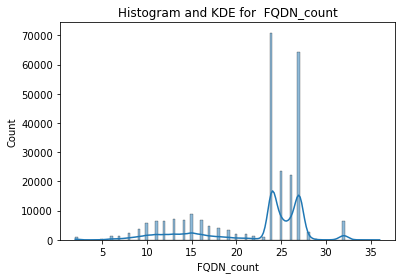

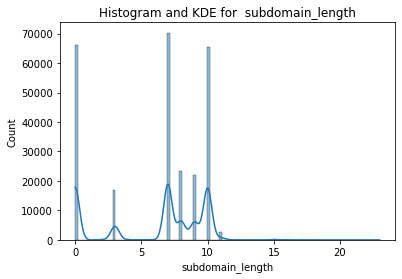

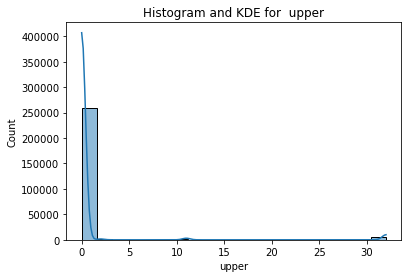

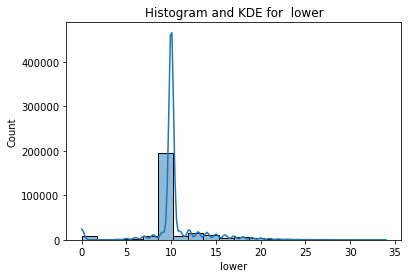

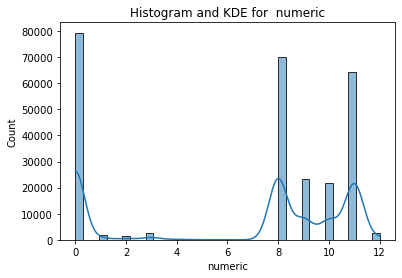

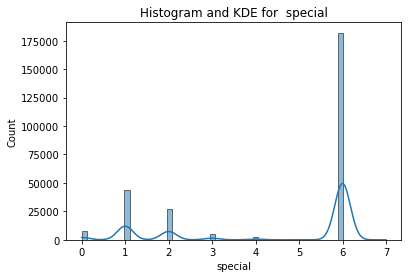

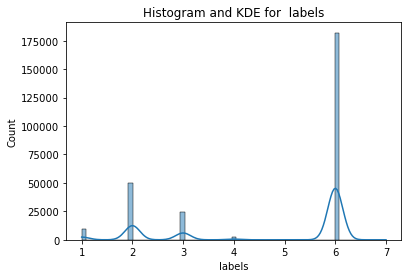

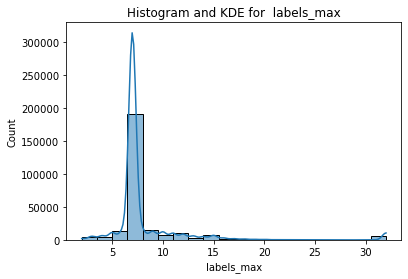

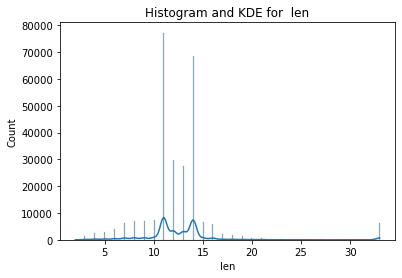

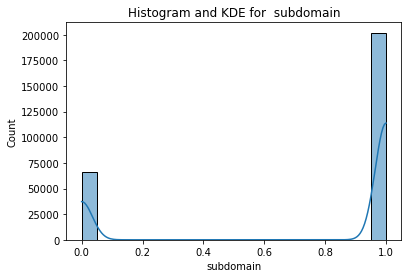

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
for j in numeric_col:
    sns.histplot(x[j],kde=True)
    plt.title('Histogram and KDE for  '+j)
    plt.show()

### ALl the features have high skewness and boxcox and log will be used to and to check if skewness removed


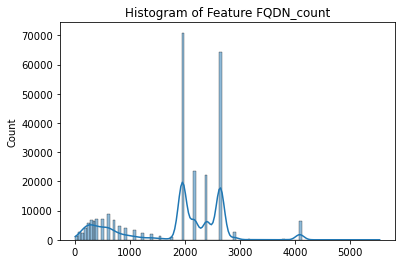

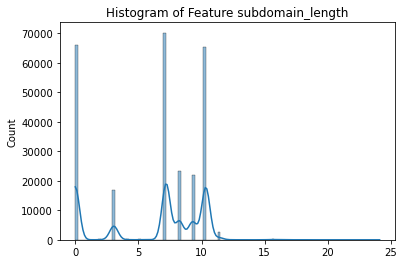

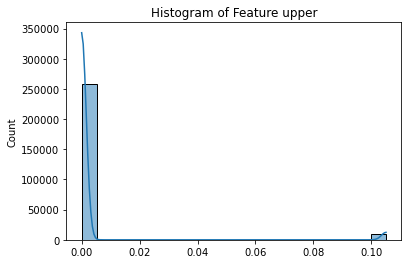

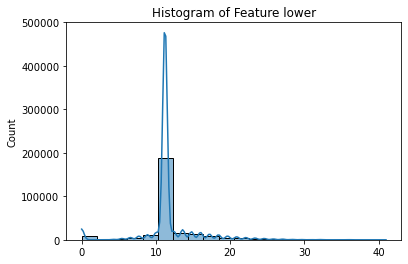

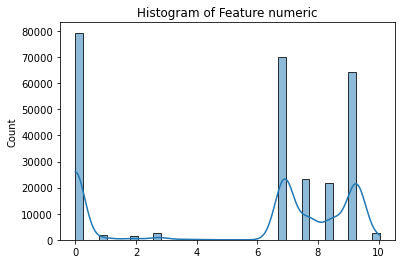

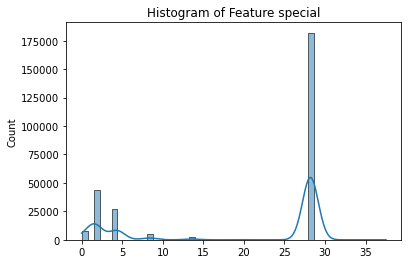

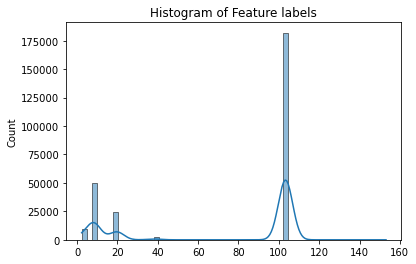

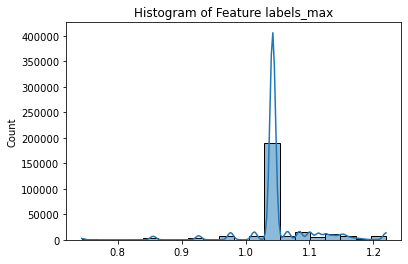

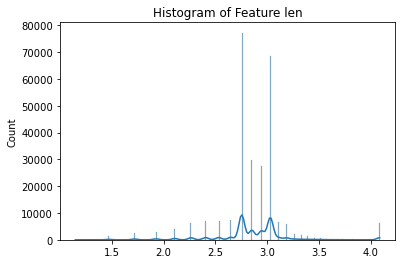

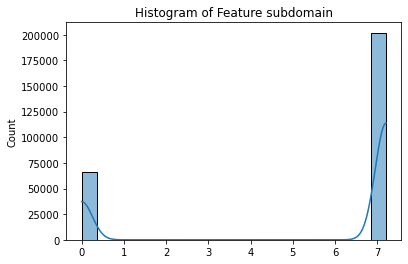

In [196]:
# Trying to solve skewness problem
from scipy import stats
for j in numeric_col:
    sns.histplot(data=stats.boxcox(x[j]+1)[0],kde=True)
    plt.title('Histogram of Feature '+j)
    plt.show()

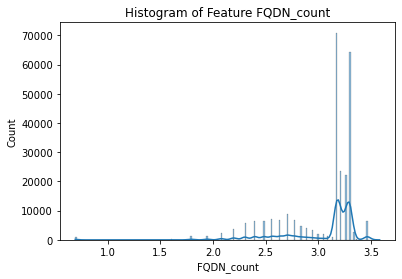

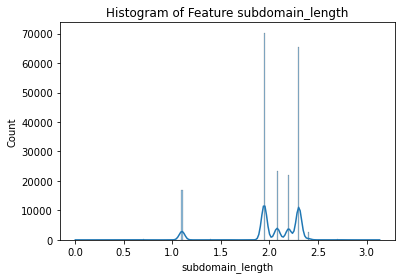

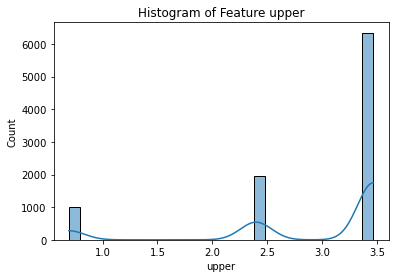

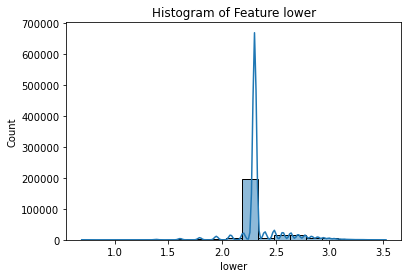

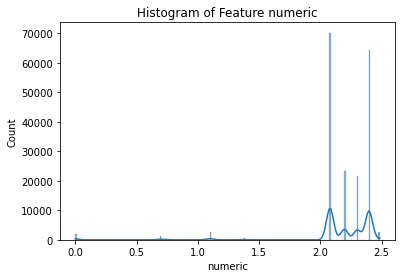

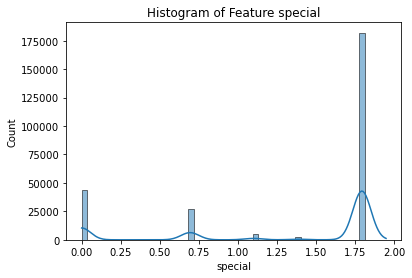

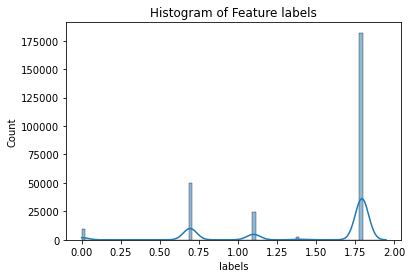

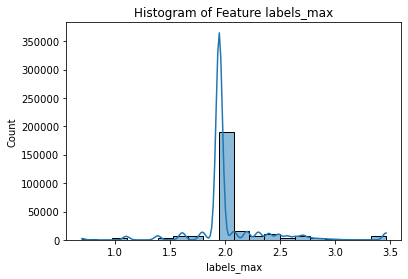

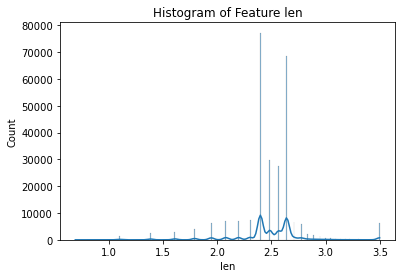

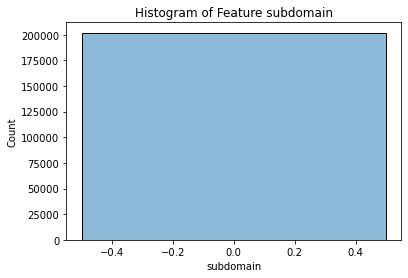

In [198]:
# Trying to solve skewness problem
from scipy import stats
for j in numeric_col:
    sns.histplot(data=np.log(x[j]),kde=True)
    plt.title('Histogram of Feature '+j)
    plt.show()

### Both the log and boxcox were unable to remove skewness of the data
1. subdomain length,lower,numeric,entropy is not skewed 

2. FQDN_count,special,labels are moderatley skewed

3. Upper,labels_max,label_average,len and submdomain are highly skewed
 
4. Sknewness is still there after transformation

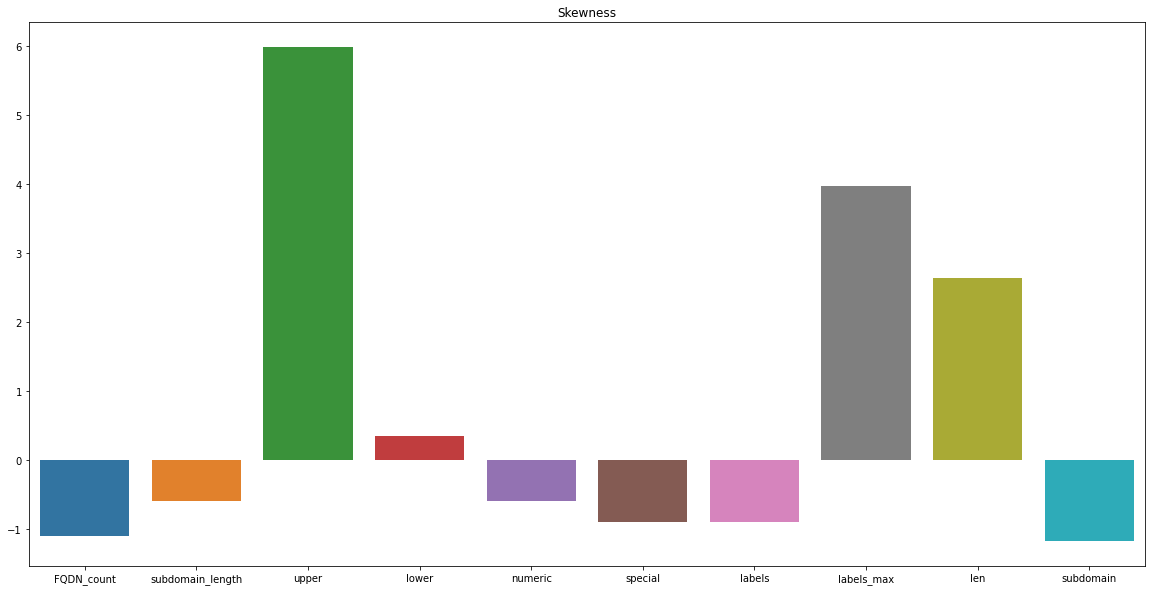

In [202]:
skewness = x[numeric_col].skew(axis=0)
plt.figure(figsize=(20,10))
plt.title('Skewness')
sns.barplot(x = numeric_col,y=skewness)
plt.show()

### Variance Analysis of Numerical Features

In [204]:
variance = x[numeric_col].describe().iloc[2]**2

In [205]:
variance

FQDN_count          36.011321
subdomain_length    15.205705
upper               24.423366
lower               10.289734
numeric             20.248138
special              4.785774
labels               3.251633
labels_max          19.495709
len                 17.453888
subdomain            0.185732
Name: std, dtype: float64

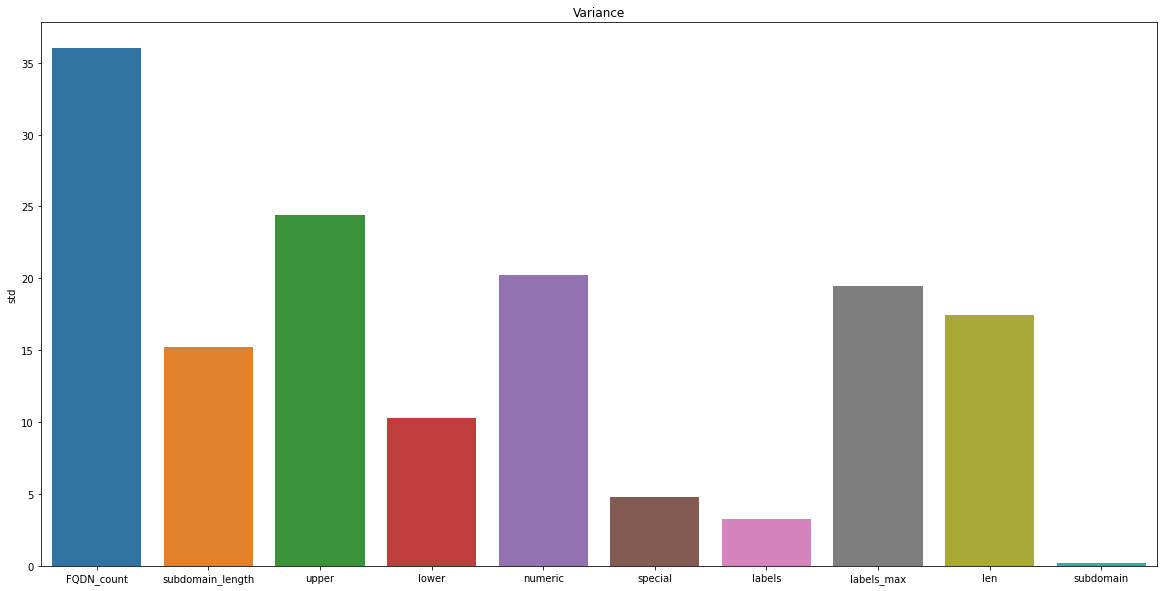

In [206]:
plt.figure(figsize=(20,10))
plt.title('Variance')
sns.barplot(x = numeric_col,y=variance)
plt.show()

### Variance Analysis

1. Subdomain, labels have loewst variance 

### Scatter Plot of Numerical Feature vs Target

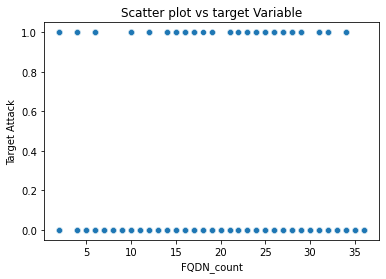

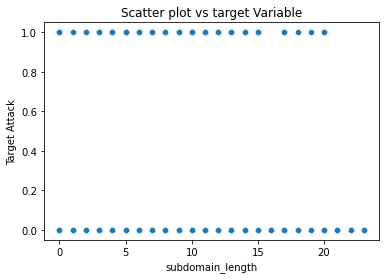

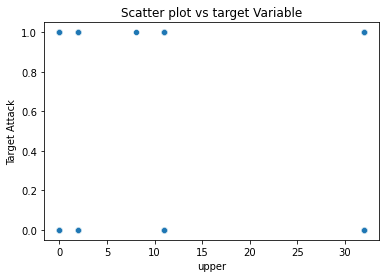

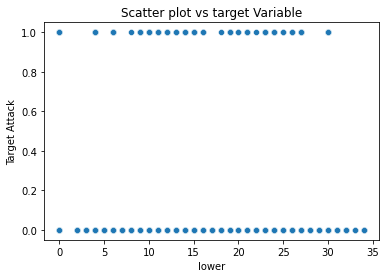

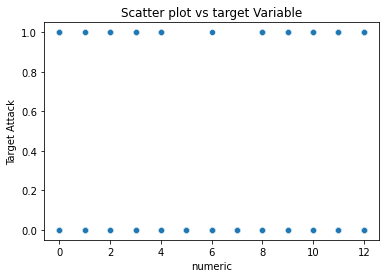

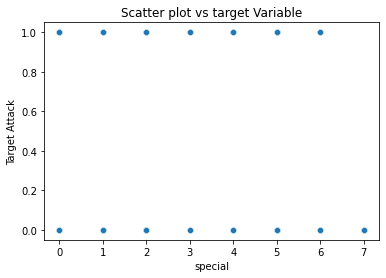

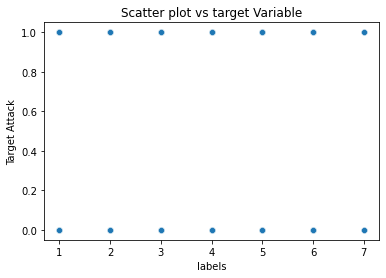

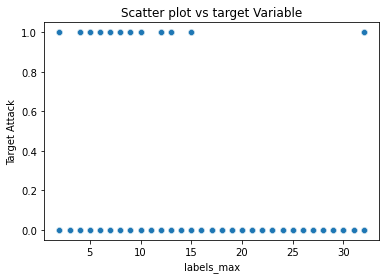

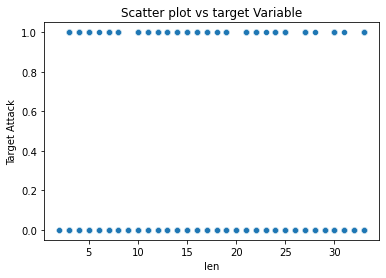

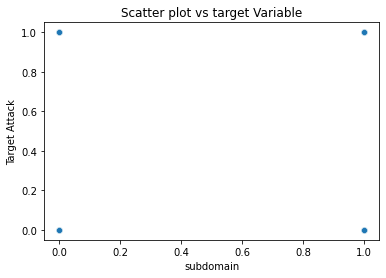

In [207]:
for j in numeric_col:
    sns.scatterplot(x[j],y)
    plt.title('Scatter plot vs target Variable')
    plt.show()

### Scatter Plot Analysis
1. Wrong method to visualzie as it always will show two lines as y is eaither 0 or 1 .

### Line Plot Analysis of feature vs target

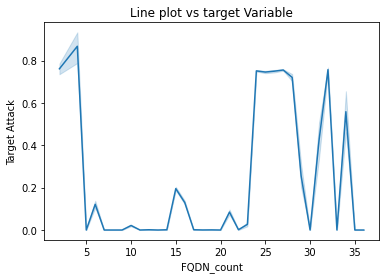

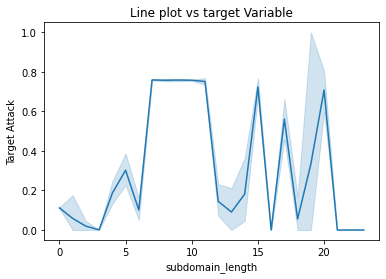

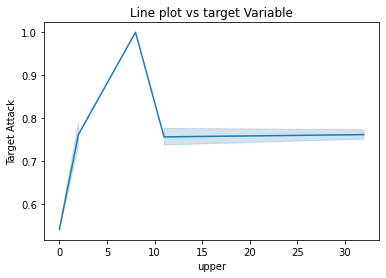

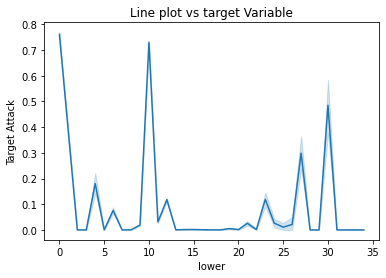

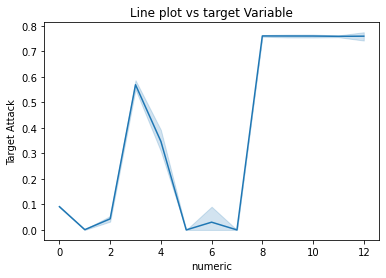

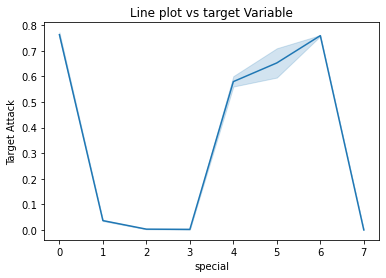

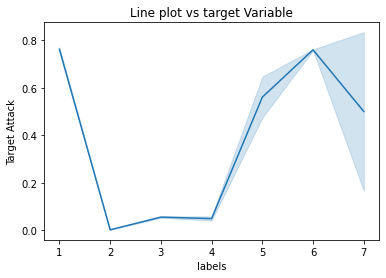

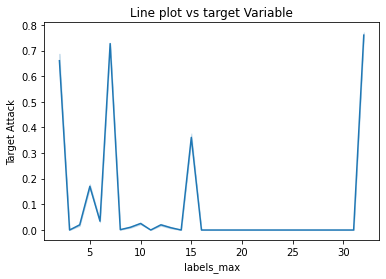

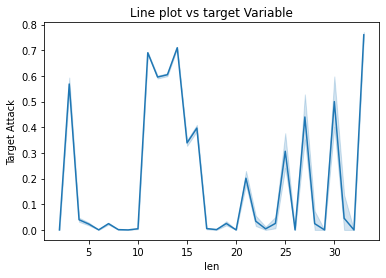

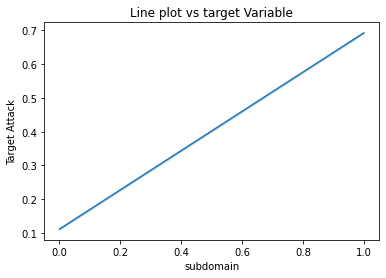

In [209]:
for j in numeric_col:
    sns.lineplot(x[j],y)
    plt.title('Line plot vs target Variable')
    plt.show()

### Line Plot Analysis
1. No significant correlation obtained only one visible is Target Attack and Subdomain are highly correlated variables

### Scatter plot of all numerical features vs features

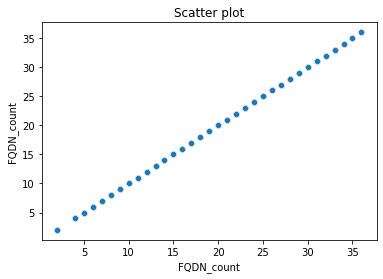

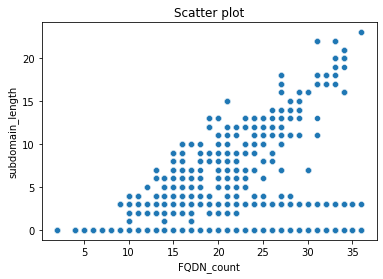

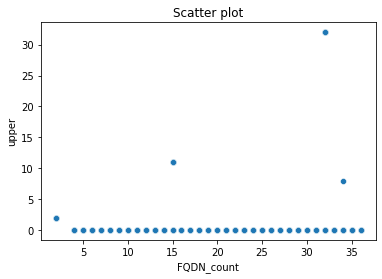

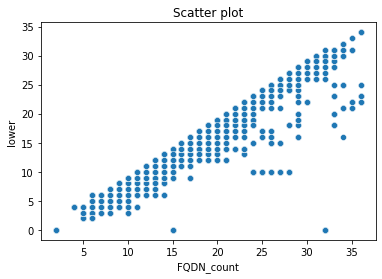

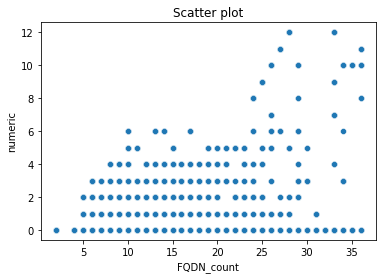

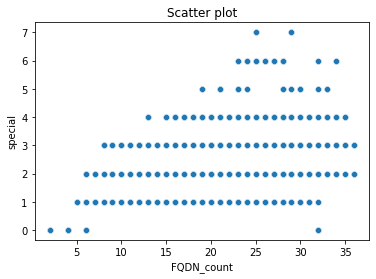

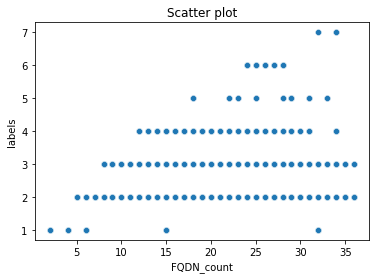

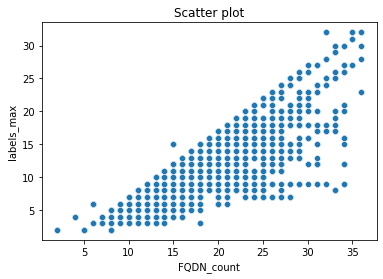

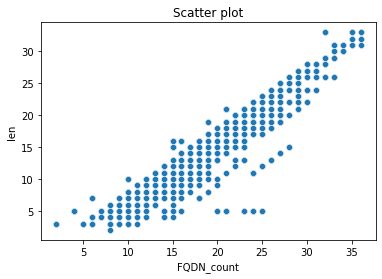

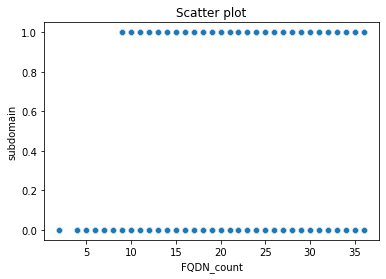

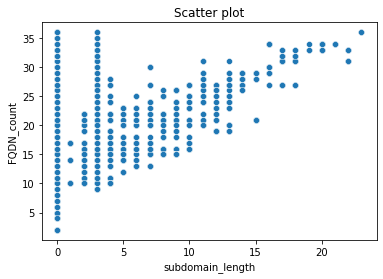

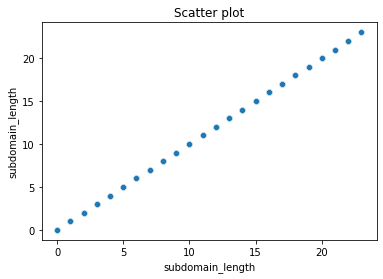

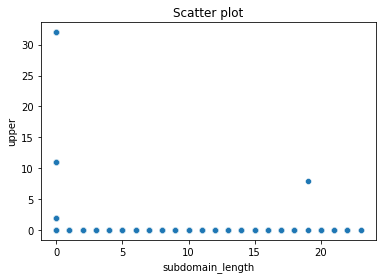

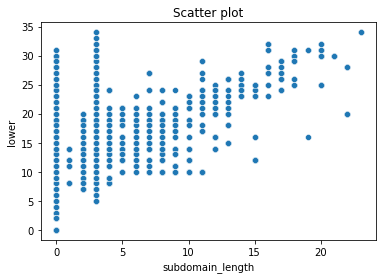

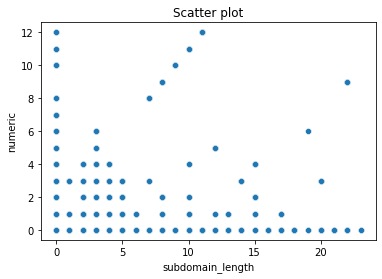

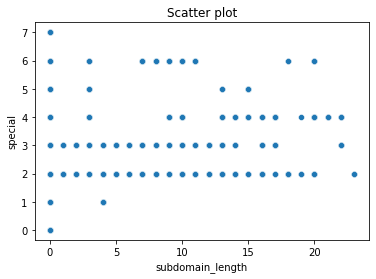

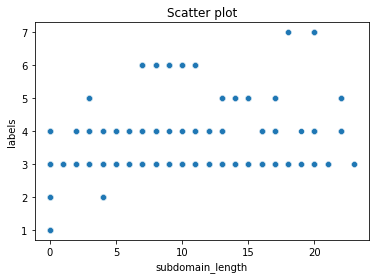

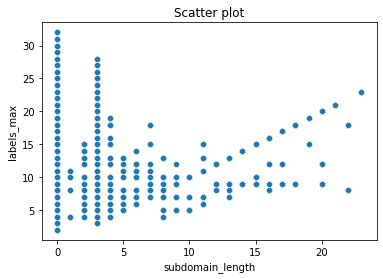

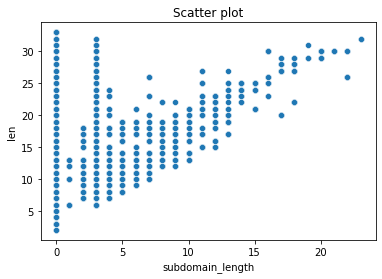

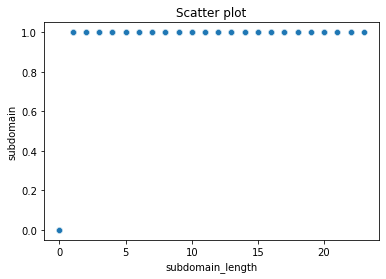

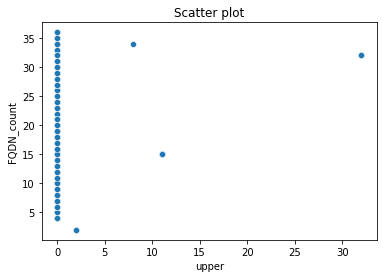

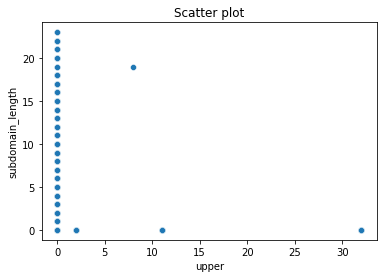

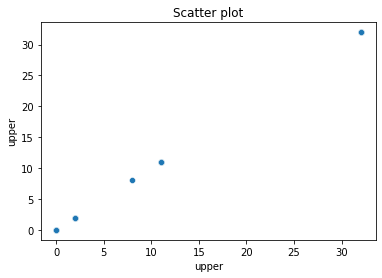

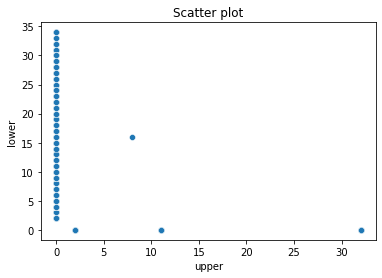

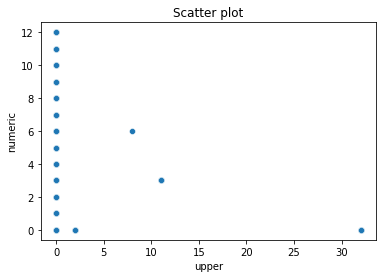

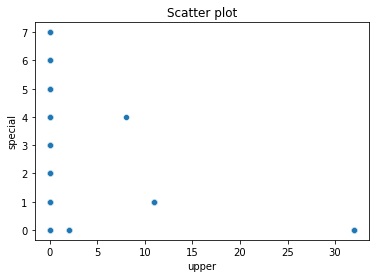

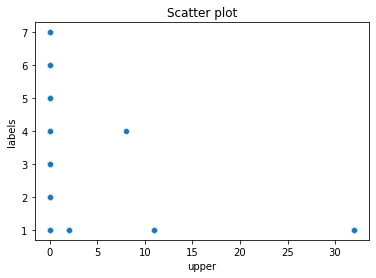

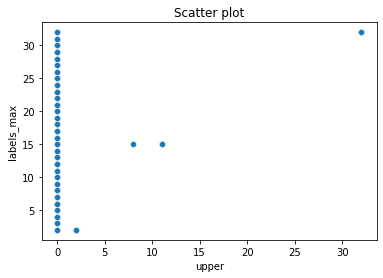

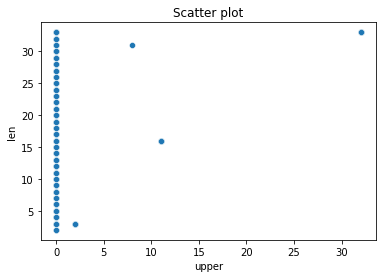

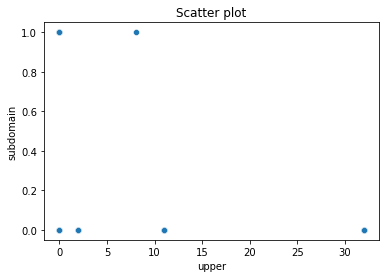

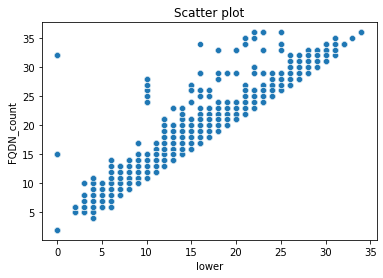

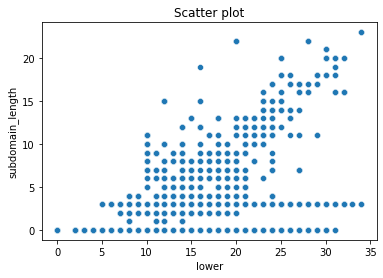

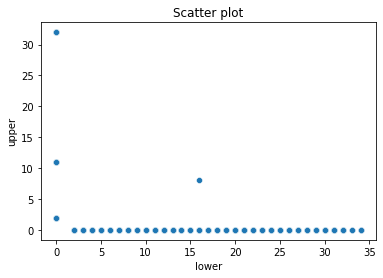

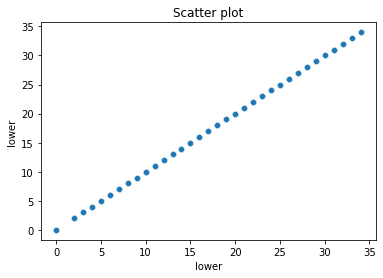

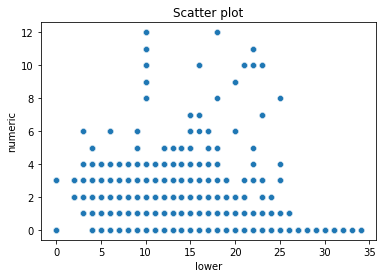

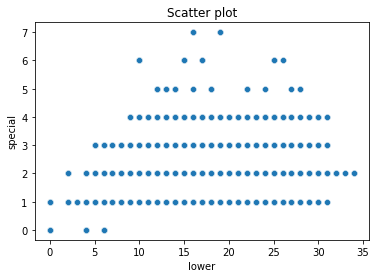

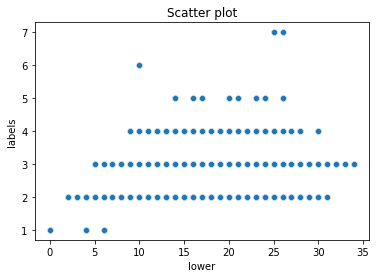

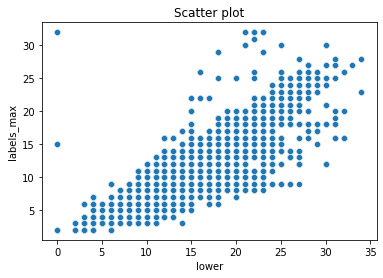

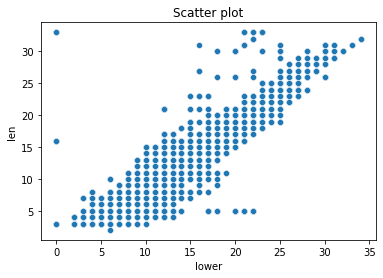

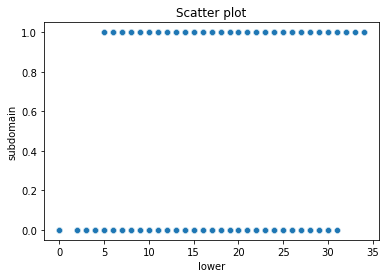

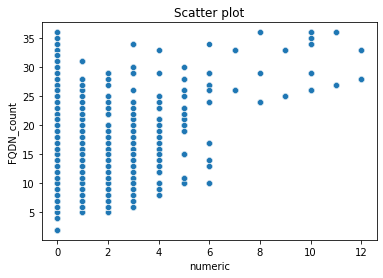

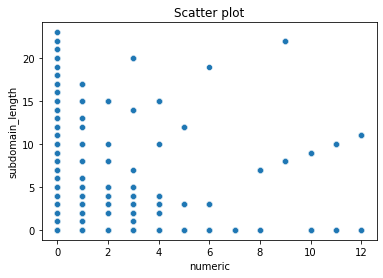

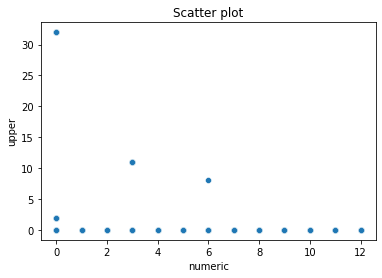

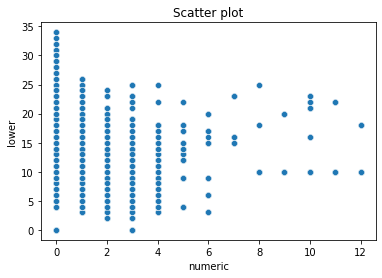

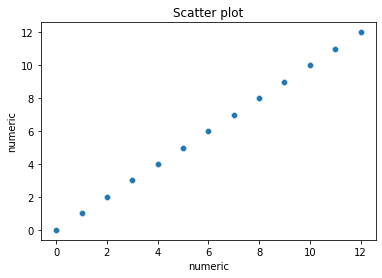

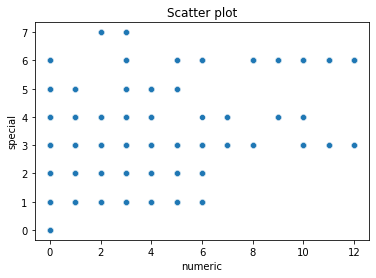

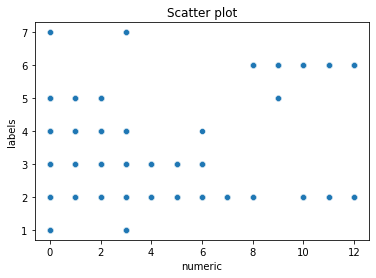

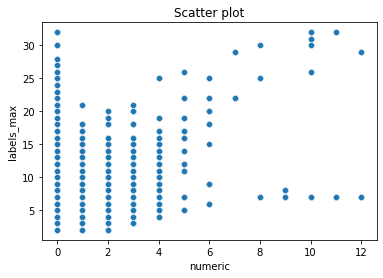

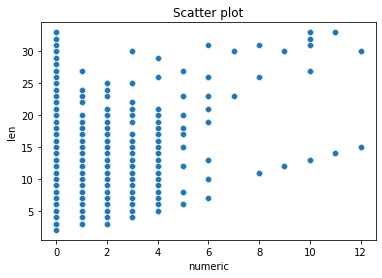

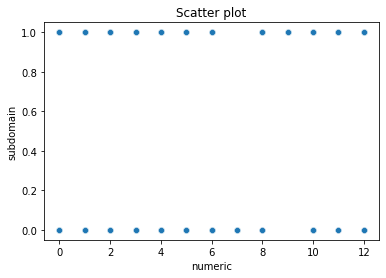

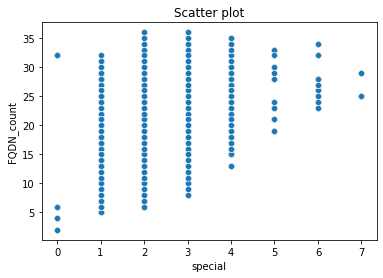

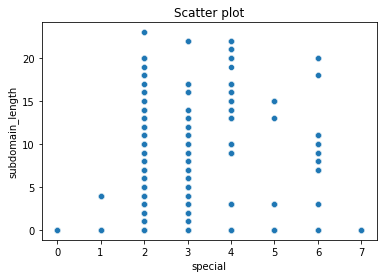

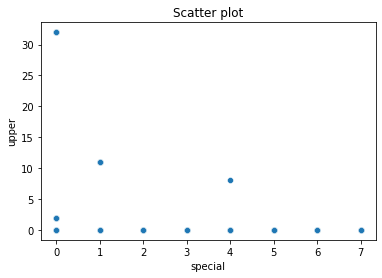

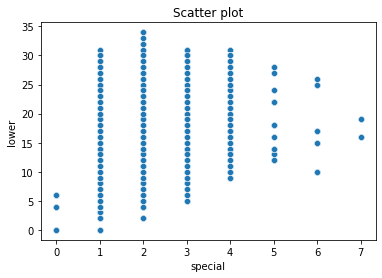

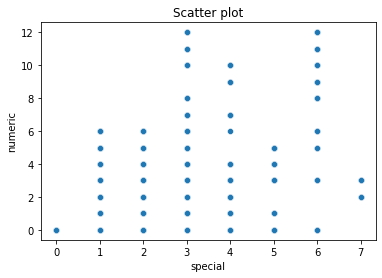

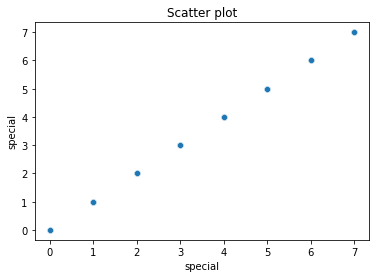

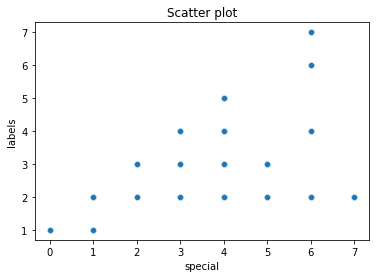

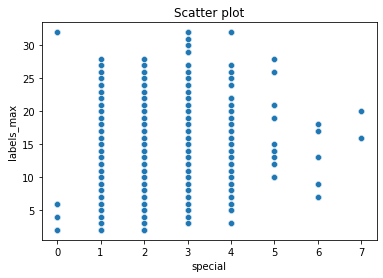

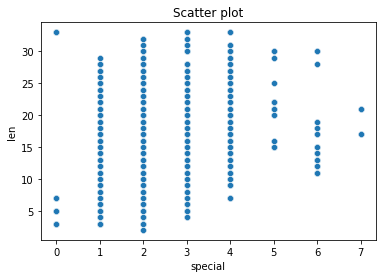

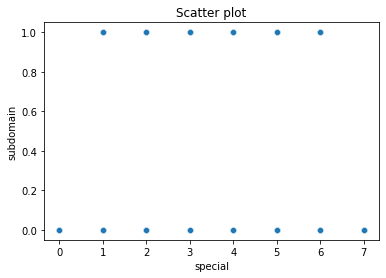

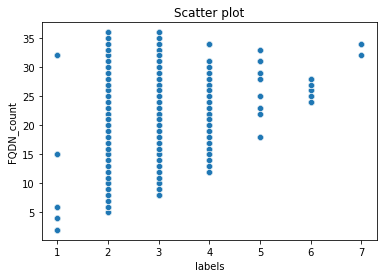

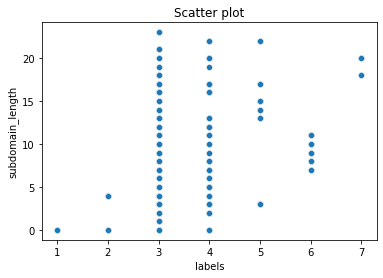

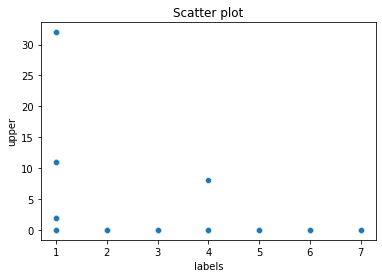

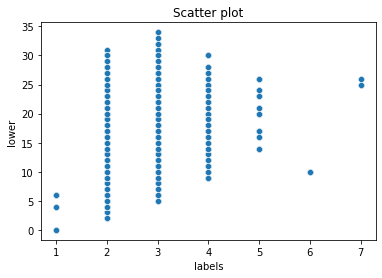

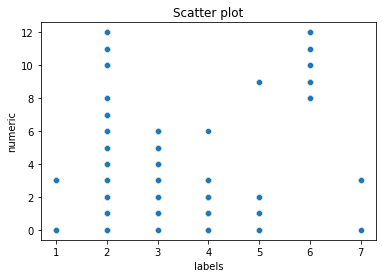

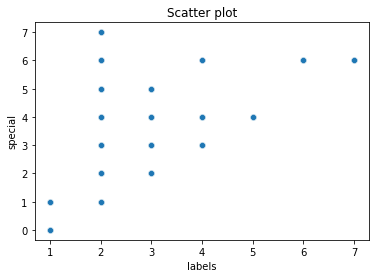

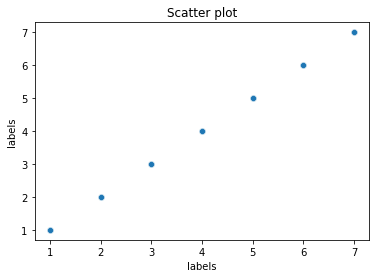

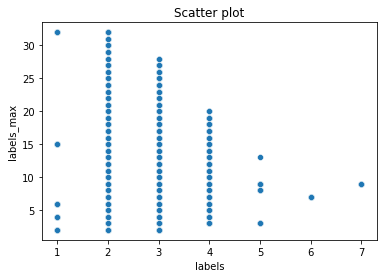

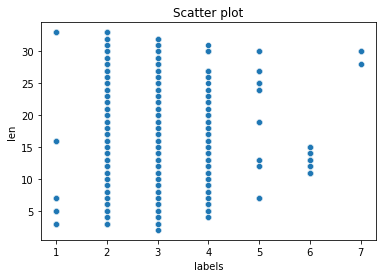

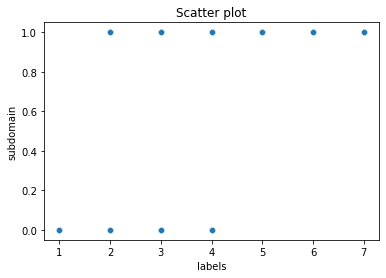

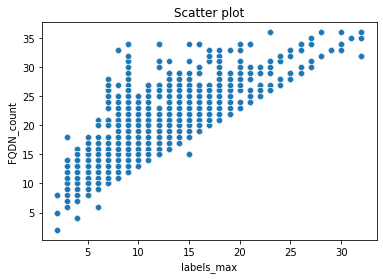

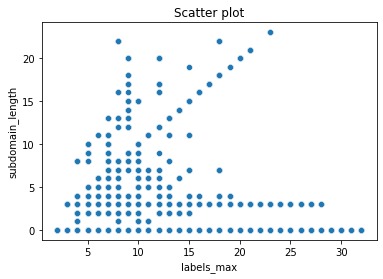

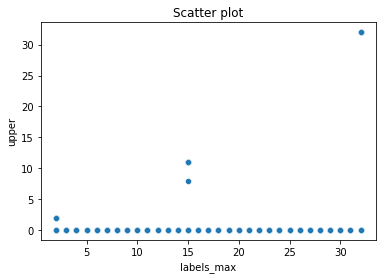

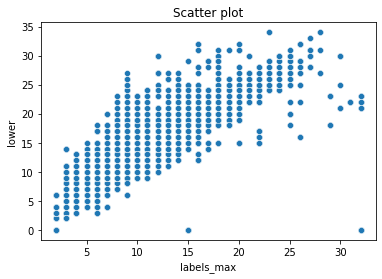

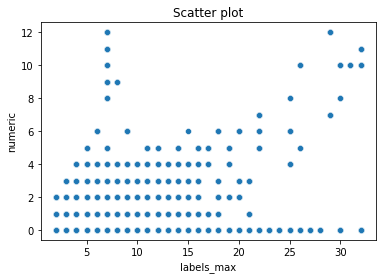

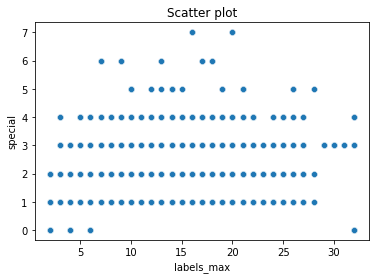

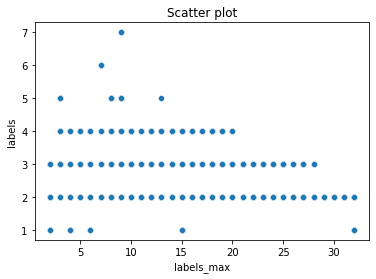

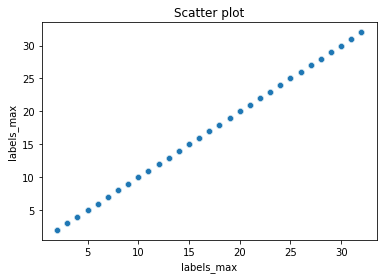

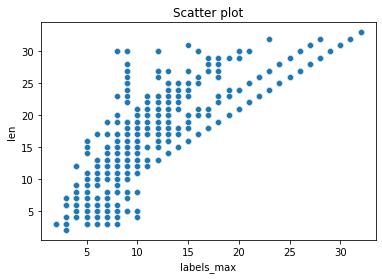

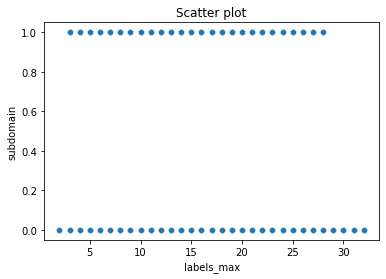

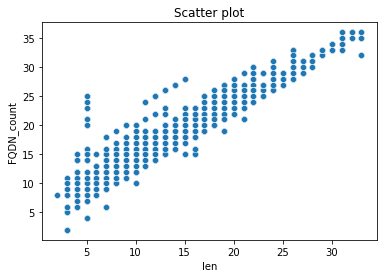

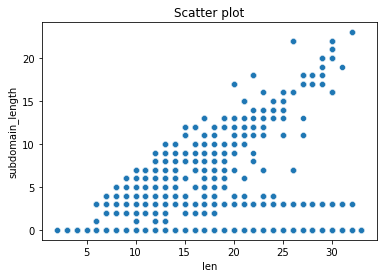

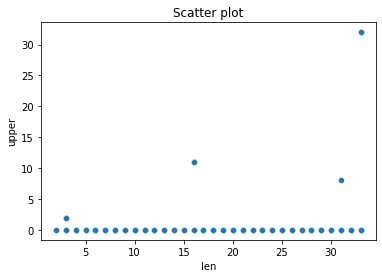

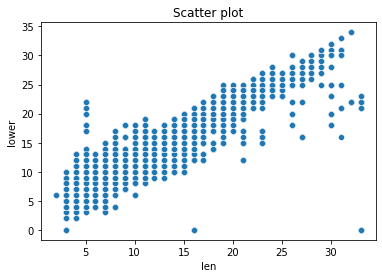

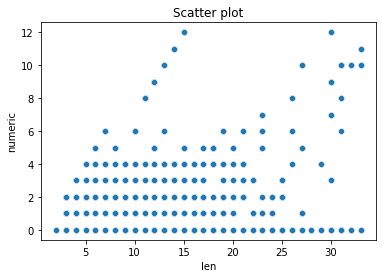

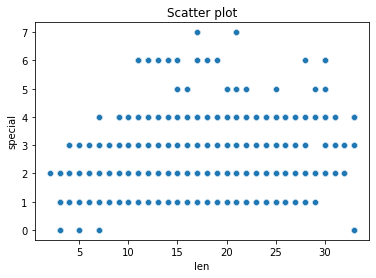

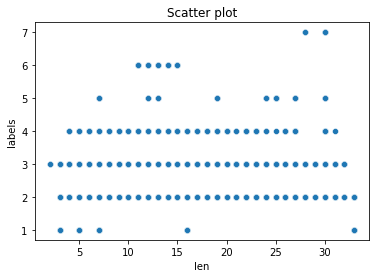

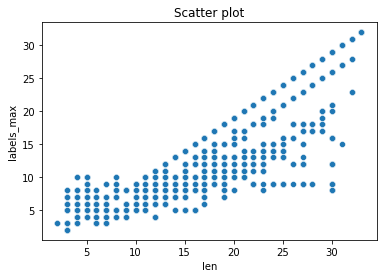

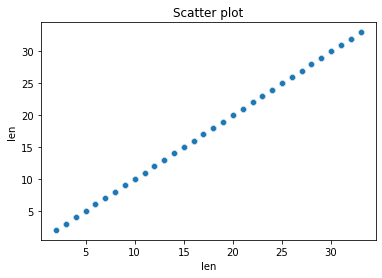

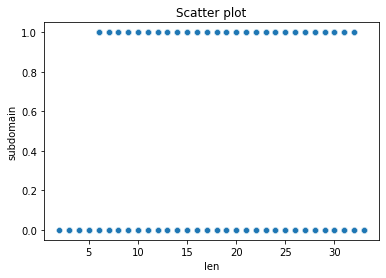

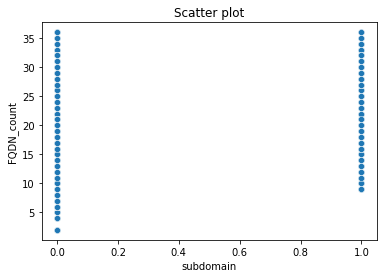

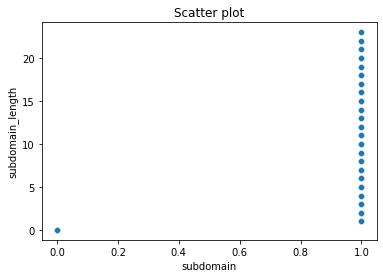

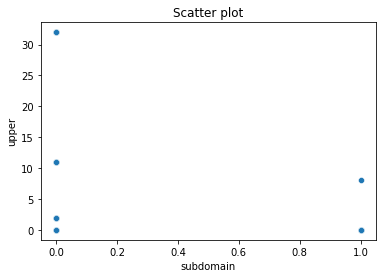

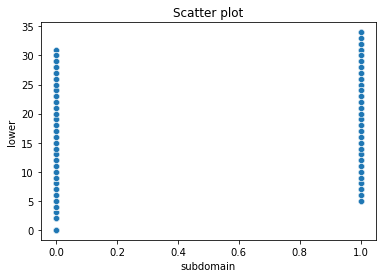

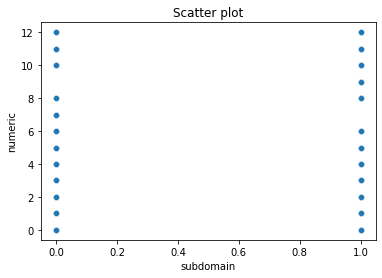

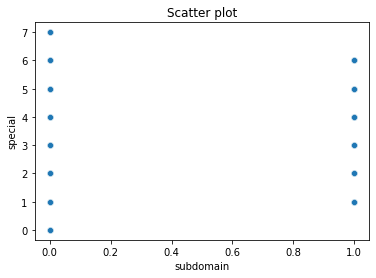

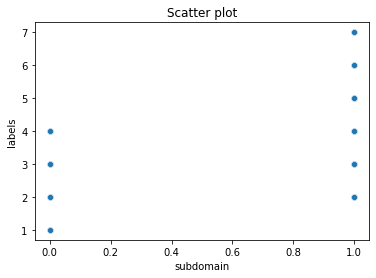

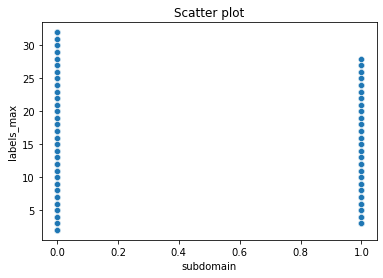

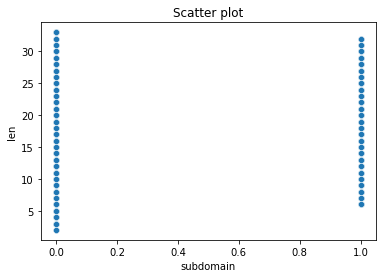

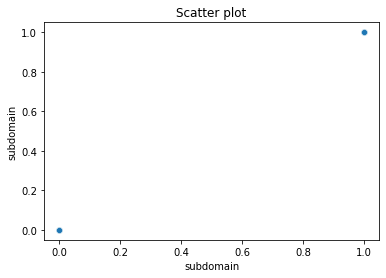

In [212]:
for j in numeric_col:
    for i in numeric_col:
        sns.scatterplot(x[j],x[i])
        plt.title('Scatter plot')
        plt.show()

### Scater Plot feature analysis
1. Upper has most values 0

2. FQDN and Lower highly correlated

3. FQDN and len highly correlated

4. Lower and len highly correlated

### Categgorical Feature Analysis

1. Tried using count plot to visualize but the number of unique value was high that unable to plot for categorical features.

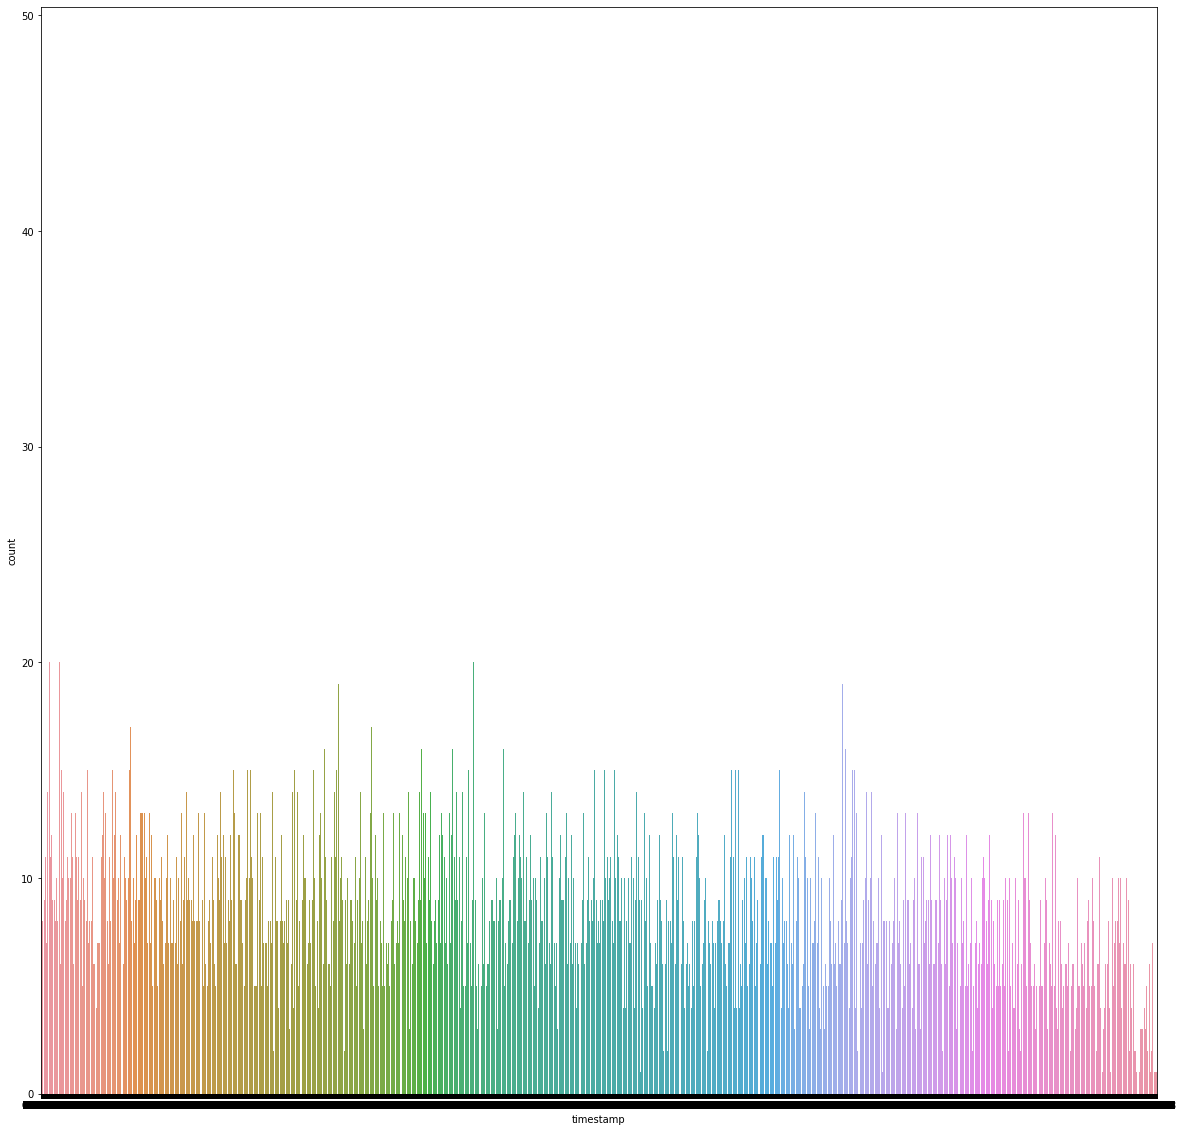

In [122]:
#TRied plotting categorical avriables but was unable to pplt
plt.figure(figsize=(20,20))
sns.countplot(x['timestamp'])
plt.show()

# 4. Feature Engineering 

4.1. Converted all categorical avriables to numerical using hashing.

4.2. Hashed by traversing each element as it doesnt work on whole column together.

4.3. Did analysis for rest left categorical features.

4.4. Missing values was checked at start only.

In [355]:
t = []
for j in x['longest_word']:
    t.append(hash(j))

In [356]:
x['longest_word'] = t

In [357]:
t = []
for j in x['timestamp']:
    t.append(hash(j))

In [358]:
x['timestamp'] = t

In [359]:
t = []
for j in x['sld']:
    t.append(hash(j))
x['sld'] = t

In [360]:
x.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,-6308899062818011216,27,10,0,10,11,2.570417,6,6,7,3.666667,6959292689969953415,-2722125931950304086,14,1
1,-7543828229647227107,27,10,0,10,11,2.767195,6,6,7,3.666667,6959292689969953415,-2722125931950304086,14,1
2,3534728701143880609,26,9,0,10,10,2.742338,6,6,7,3.500000,6959292689969953415,-2722125931950304086,13,1
3,-4674700651816309986,27,10,0,10,11,2.570417,6,6,7,3.666667,6959292689969953415,-2722125931950304086,14,1
4,-8222144851128702929,15,9,0,11,0,2.929439,4,3,5,4.333333,5367117181684438901,5367117181684438901,15,1


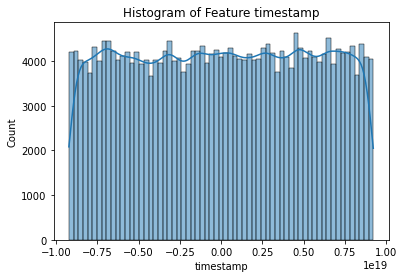

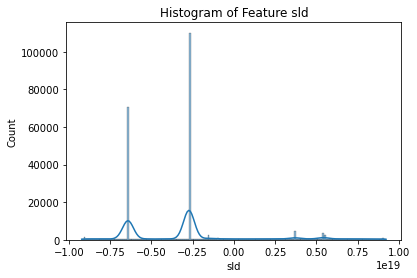

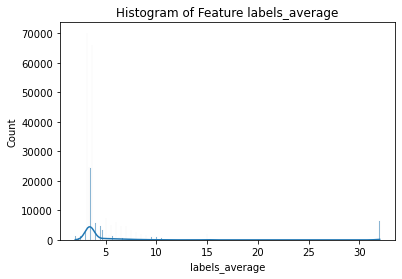

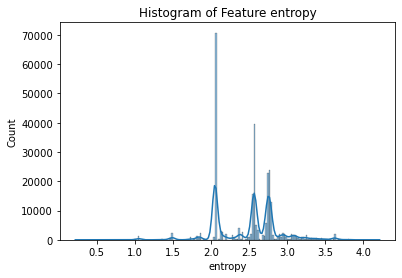

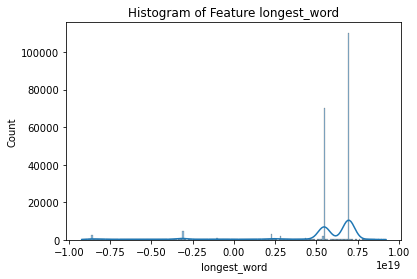

In [221]:
import seaborn as sns
for j in (set(x.columns) - set(numeric_col)):
    
    sns.histplot(data=x[j],kde=True)
    plt.title('Histogram of Feature '+j)
    plt.show()

In [224]:
(set(x.columns) - set(numeric_col))

{'entropy', 'labels_average', 'longest_word', 'sld', 'timestamp'}

In [229]:
skewness_c = x.skew(axis=0)

In [235]:
print(x['timestamp'].skew(axis=0))
print(x['sld'].skew(axis=0))
print(x['longest_word'].skew(axis=0))


-0.010087425403826185
1.1113360346401027
-1.6789379571752487


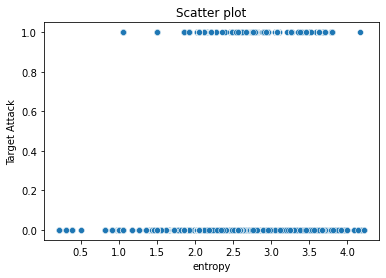

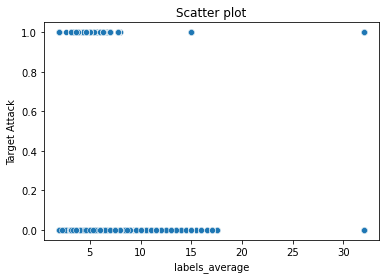

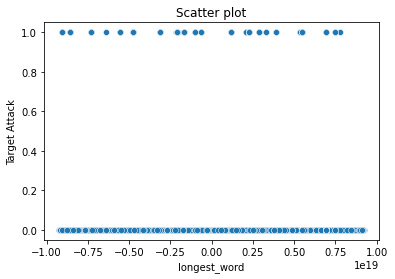

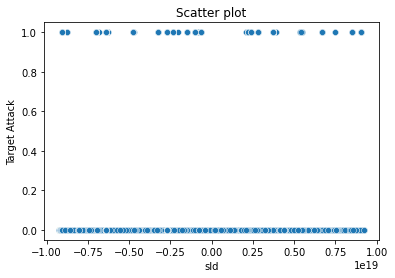

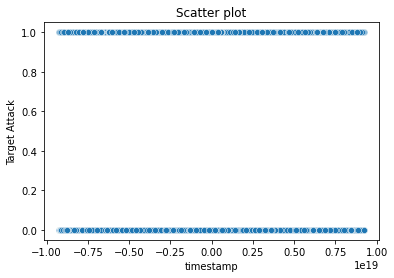

In [236]:
cat =['entropy', 'labels_average', 'longest_word', 'sld', 'timestamp']
for j in cat:
    sns.scatterplot(x[j],y)
    plt.title('Scatter plot')
    plt.show()

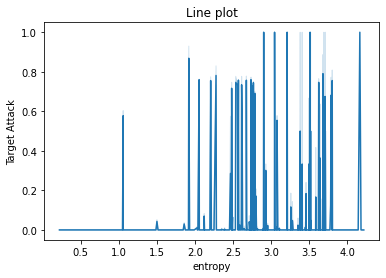

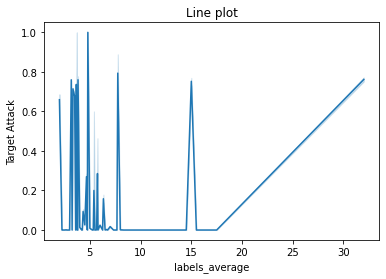

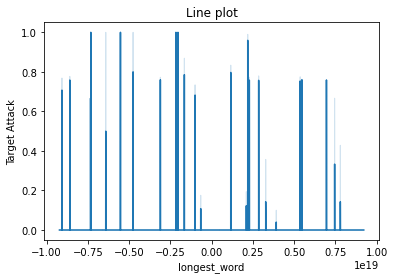

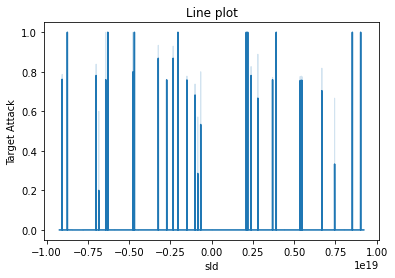

KeyboardInterrupt: 

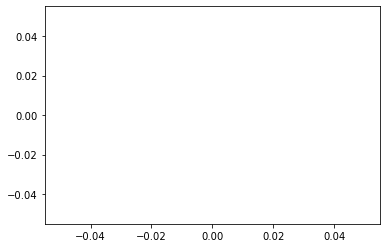

In [237]:
cat =['entropy', 'labels_average', 'longest_word', 'sld', 'timestamp']# Laptop Crahsed when creating plot for timestamp
for j in cat:
    sns.lineplot(x[j],y)
    plt.title('Line plot')
    plt.show()

### Scatter Plot/ Line Plot Analysis after Feature Engineering

1. No noteable relation between categorical features and target

# 5.1 Feature Selection

5.1. First Method of Feature Selection using Correlation.

5.2. SEcond MEthod of Feature Selection based on variance.

5.3. Third Method of Feature Selection abse don skewness

5.3  Fourth Method of Feature selection based on RandomTreeCLassifier.

5.4  Fifth Method of Feature Selection based on RecursiveFeatureSelection. 

### Correlation Analysis

In [238]:
corr = pd.concat([x,y],axis=1).corr().iloc[15][0:15]

In [239]:
corr

timestamp           0.001754
FQDN_count          0.563542
subdomain_length    0.572035
upper               0.072891
lower              -0.295618
numeric             0.599234
entropy            -0.119091
special             0.582088
labels              0.569396
labels_max         -0.096373
labels_average     -0.077173
longest_word        0.422876
sld                -0.290156
len                 0.159402
subdomain           0.502457
Name: Target Attack, dtype: float64

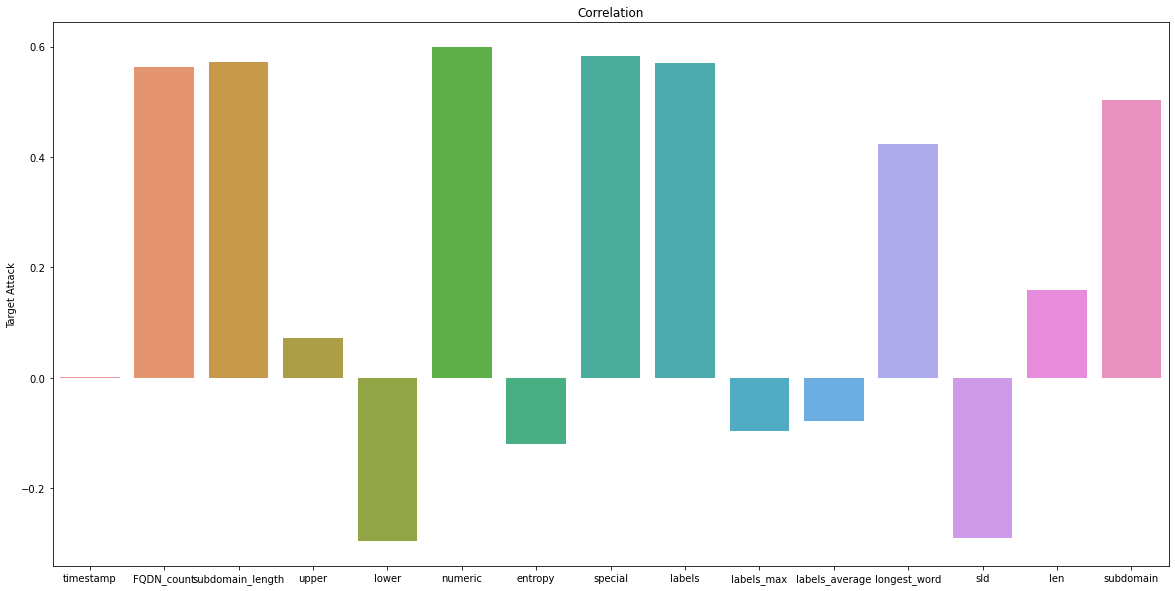

In [240]:

plt.figure(figsize=(20,10))
sns.barplot(x =x.columns ,y=corr)
plt.title('Correlation')
plt.show()

### Correlation Analysis 

1. Upper, Labels_average,labels_max and entropy are least correlated

### Variance Analysis

In [241]:
variance = x[x.columns].describe().iloc[2]**2

In [242]:
variance


timestamp           2.840150e+37
FQDN_count          3.601132e+01
subdomain_length    1.520570e+01
upper               2.442337e+01
lower               1.028973e+01
numeric             2.024814e+01
entropy             1.662254e-01
special             4.785774e+00
labels              3.251633e+00
labels_max          1.949571e+01
labels_average      2.091354e+01
longest_word        1.873329e+37
sld                 1.598746e+37
len                 1.745389e+01
subdomain           1.857323e-01
Name: std, dtype: float64

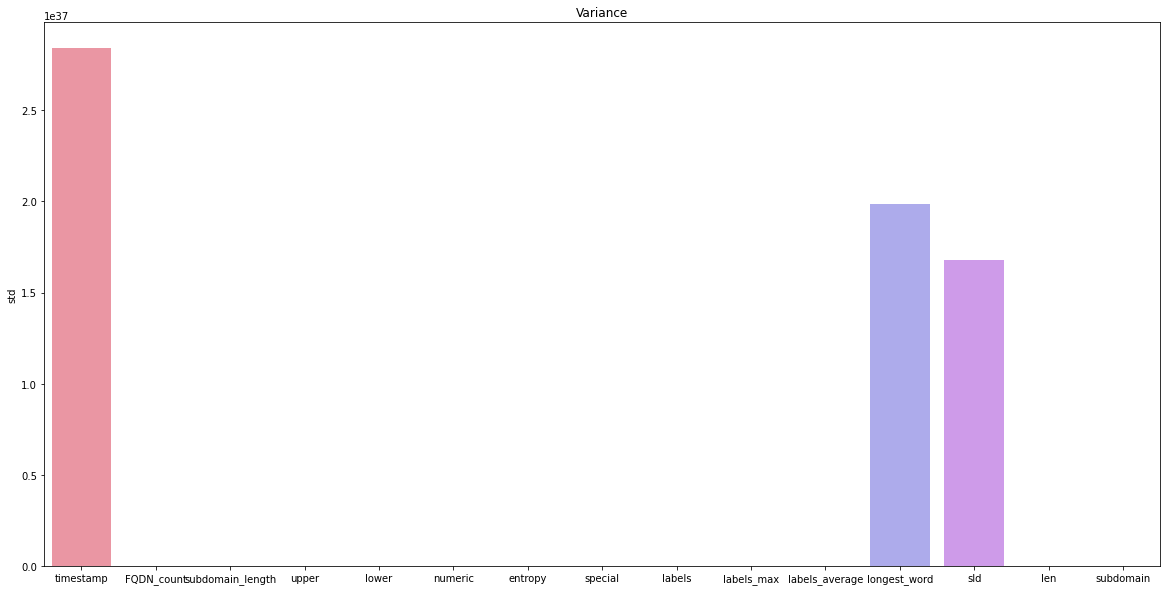

In [243]:
plt.figure(figsize=(20,10))
sns.barplot(x =x.columns ,y=var)
plt.title('Variance')
plt.show()

In [244]:
print(var < 0.2)

timestamp           False
FQDN_count          False
subdomain_length    False
upper               False
lower               False
numeric             False
entropy              True
special             False
labels              False
labels_max          False
labels_average      False
longest_word        False
sld                 False
len                 False
subdomain            True
Name: std, dtype: bool


### Variance Analysis
1. Entropy and subdomain are less than threshold 0.2 hence have lowest variance.

### Skewness Analsyis

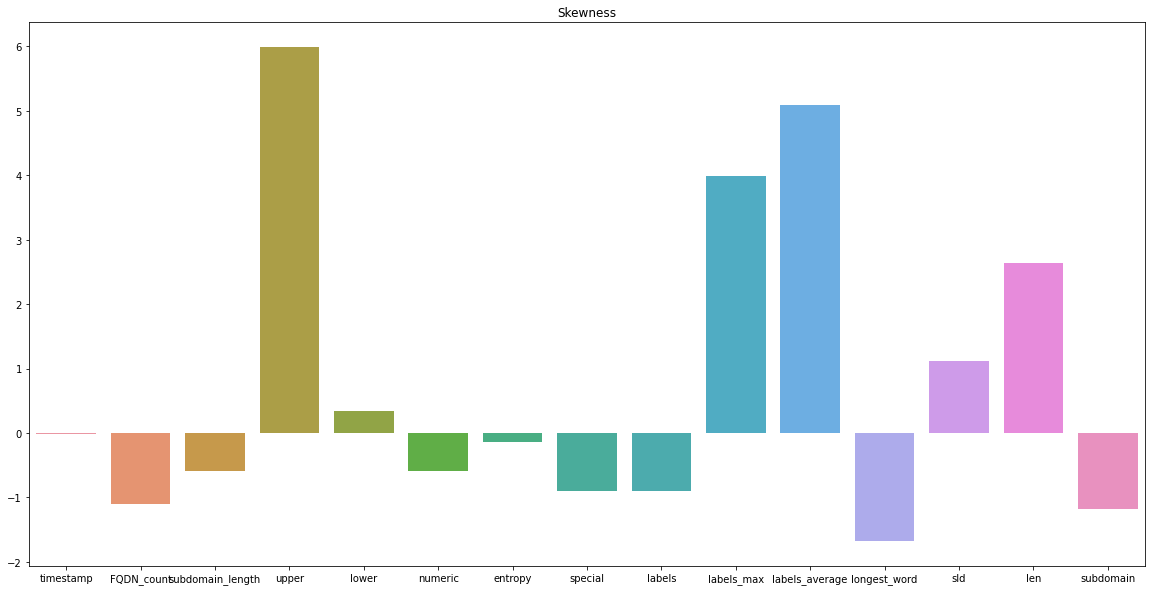

In [245]:
plt.figure(figsize=(20,10))
sns.barplot(x =x.columns ,y=x.skew(axis=0))
plt.title('Skewness')
plt.show()

### Skewness ANalysis
1. Labels_average,upper and labels_max are highly skewed

### Random Forest Classifier Analysis

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),max_features=8)


sel.fit(x, y)

SelectFromModel(estimator=RandomForestClassifier(), max_features=8)

In [250]:
selected_feat= x.columns[(sel.get_support())]
len(selected_feat)

4

In [251]:
print(selected_feat)
print(set(x.columns)-set(selected_feat))

Index(['timestamp', 'FQDN_count', 'special', 'labels'], dtype='object')
{'lower', 'sld', 'subdomain_length', 'labels_average', 'len', 'subdomain', 'entropy', 'longest_word', 'numeric', 'labels_max', 'upper'}


### Random Forest Classifier Analysis 
1. 'lower', 'sld', 'subdomain_length', 'labels_average', 'len', 'subdomain', 'entropy', 'longest_word', 'numeric', 'labels_max', 'upper'
 are removed by random forest selection

### Recursive Feature Elimination for selection

In [252]:
from sklearn.feature_selection import RFE

In [253]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
selector = RFE(estimator=lr, n_features_to_select=6, step=1)

In [254]:
selector.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=6)

In [255]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True])

In [256]:
x.columns

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain'],
      dtype='object')

### Recursive Feature elimination ANalysis
1. 'timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower','numeric', 'entropy', 'special', 'labels' will be dropped as per model

## Final Feature Selection

1.  'timestamp','upper','labels_max','labels_average','entropy','subdomain' will be dropped

# Model Training

1. Model was split into 67:33 ratio.

2. Normalization of the data 

3. Dropping the features.

4. On Train part models was trained using grid search cv.

5. Scoring Metric Recall Chosen to maximise TP to detect more attacks.

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.33,random_state=42)

In [363]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(197219, 15) (97139, 15) (197219,) (97139,)


In [364]:
np.unique(train_y,return_counts=True)

(array([0, 1], dtype=int64), array([98729, 98490], dtype=int64))

In [365]:
np.unique(test_y,return_counts=True)

(array([0, 1], dtype=int64), array([48450, 48689], dtype=int64))

In [366]:
from sklearn.model_selection import StratifiedKFold

In [367]:
kf = StratifiedKFold(n_splits=10,random_state=10,shuffle=True)

In [368]:
kf.get_n_splits(train_x, train_y)

10

In [369]:
x.columns

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain'],
      dtype='object')

In [370]:
#upper,lower,labels_average,labels_max,entropy will be dropped


train_x = train_x.drop(['timestamp','upper','labels_max','labels_average','entropy','subdomain'],axis=1)

In [371]:
test_x = test_x.drop(['timestamp','upper','labels_max','labels_average','entropy','subdomain'],axis=1)

In [372]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(197219, 9) (197219,) (97139, 9) (97139,)


In [373]:
param_dt = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth':list(range(1,52,2))
}
param_rf = {
    'n_estimators':[100,200],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':list(range(1,52,2))
}

In [374]:
import multiprocessing
n_jobs = multiprocessing.cpu_count()-1

In [375]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [376]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm2 = MinMaxScaler()
train_x = mm.fit_transform(train_x)
test_x = mm2.fit_transform(test_x)

In [377]:
dt = dt = DecisionTreeClassifier()
grid1 = GridSearchCV(dt, param_dt, cv=kf, scoring='recall',verbose=10)
    
grid1.fit(train_x,train_y)
    
dt = grid1.best_estimator_
    

Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV 1/10; 1/78] START criterion=gini, max_depth=1...............................
[CV 1/10; 1/78] END criterion=gini, max_depth=1;, score=0.973 total time=   0.0s
[CV 2/10; 1/78] START criterion=gini, max_depth=1...............................
[CV 2/10; 1/78] END criterion=gini, max_depth=1;, score=0.974 total time=   0.0s
[CV 3/10; 1/78] START criterion=gini, max_depth=1...............................
[CV 3/10; 1/78] END criterion=gini, max_depth=1;, score=0.976 total time=   0.0s
[CV 4/10; 1/78] START criterion=gini, max_depth=1...............................
[CV 4/10; 1/78] END criterion=gini, max_depth=1;, score=0.971 total time=   0.0s
[CV 5/10; 1/78] START criterion=gini, max_depth=1...............................
[CV 5/10; 1/78] END criterion=gini, max_depth=1;, score=0.974 total time=   0.0s
[CV 6/10; 1/78] START criterion=gini, max_depth=1...............................
[CV 6/10; 1/78] END criterion=gini, max_depth=

[CV 1/10; 6/78] END criterion=gini, max_depth=11;, score=1.000 total time=   0.2s
[CV 2/10; 6/78] START criterion=gini, max_depth=11..............................
[CV 2/10; 6/78] END criterion=gini, max_depth=11;, score=1.000 total time=   0.2s
[CV 3/10; 6/78] START criterion=gini, max_depth=11..............................
[CV 3/10; 6/78] END criterion=gini, max_depth=11;, score=1.000 total time=   0.2s
[CV 4/10; 6/78] START criterion=gini, max_depth=11..............................
[CV 4/10; 6/78] END criterion=gini, max_depth=11;, score=1.000 total time=   0.3s
[CV 5/10; 6/78] START criterion=gini, max_depth=11..............................
[CV 5/10; 6/78] END criterion=gini, max_depth=11;, score=1.000 total time=   0.3s
[CV 6/10; 6/78] START criterion=gini, max_depth=11..............................
[CV 6/10; 6/78] END criterion=gini, max_depth=11;, score=1.000 total time=   0.2s
[CV 7/10; 6/78] START criterion=gini, max_depth=11..............................
[CV 7/10; 6/78] END cr

[CV 2/10; 11/78] END criterion=gini, max_depth=21;, score=1.000 total time=   0.2s
[CV 3/10; 11/78] START criterion=gini, max_depth=21.............................
[CV 3/10; 11/78] END criterion=gini, max_depth=21;, score=1.000 total time=   0.2s
[CV 4/10; 11/78] START criterion=gini, max_depth=21.............................
[CV 4/10; 11/78] END criterion=gini, max_depth=21;, score=1.000 total time=   0.2s
[CV 5/10; 11/78] START criterion=gini, max_depth=21.............................
[CV 5/10; 11/78] END criterion=gini, max_depth=21;, score=1.000 total time=   0.2s
[CV 6/10; 11/78] START criterion=gini, max_depth=21.............................
[CV 6/10; 11/78] END criterion=gini, max_depth=21;, score=1.000 total time=   0.2s
[CV 7/10; 11/78] START criterion=gini, max_depth=21.............................
[CV 7/10; 11/78] END criterion=gini, max_depth=21;, score=1.000 total time=   0.2s
[CV 8/10; 11/78] START criterion=gini, max_depth=21.............................
[CV 8/10; 11/78]

[CV 2/10; 16/78] END criterion=gini, max_depth=31;, score=1.000 total time=   0.2s
[CV 3/10; 16/78] START criterion=gini, max_depth=31.............................
[CV 3/10; 16/78] END criterion=gini, max_depth=31;, score=1.000 total time=   0.2s
[CV 4/10; 16/78] START criterion=gini, max_depth=31.............................
[CV 4/10; 16/78] END criterion=gini, max_depth=31;, score=1.000 total time=   0.2s
[CV 5/10; 16/78] START criterion=gini, max_depth=31.............................
[CV 5/10; 16/78] END criterion=gini, max_depth=31;, score=1.000 total time=   0.2s
[CV 6/10; 16/78] START criterion=gini, max_depth=31.............................
[CV 6/10; 16/78] END criterion=gini, max_depth=31;, score=1.000 total time=   0.2s
[CV 7/10; 16/78] START criterion=gini, max_depth=31.............................
[CV 7/10; 16/78] END criterion=gini, max_depth=31;, score=1.000 total time=   0.2s
[CV 8/10; 16/78] START criterion=gini, max_depth=31.............................
[CV 8/10; 16/78]

[CV 2/10; 21/78] END criterion=gini, max_depth=41;, score=1.000 total time=   0.2s
[CV 3/10; 21/78] START criterion=gini, max_depth=41.............................
[CV 3/10; 21/78] END criterion=gini, max_depth=41;, score=1.000 total time=   0.3s
[CV 4/10; 21/78] START criterion=gini, max_depth=41.............................
[CV 4/10; 21/78] END criterion=gini, max_depth=41;, score=1.000 total time=   0.2s
[CV 5/10; 21/78] START criterion=gini, max_depth=41.............................
[CV 5/10; 21/78] END criterion=gini, max_depth=41;, score=1.000 total time=   0.2s
[CV 6/10; 21/78] START criterion=gini, max_depth=41.............................
[CV 6/10; 21/78] END criterion=gini, max_depth=41;, score=1.000 total time=   0.2s
[CV 7/10; 21/78] START criterion=gini, max_depth=41.............................
[CV 7/10; 21/78] END criterion=gini, max_depth=41;, score=1.000 total time=   0.2s
[CV 8/10; 21/78] START criterion=gini, max_depth=41.............................
[CV 8/10; 21/78]

[CV 2/10; 26/78] END criterion=gini, max_depth=51;, score=1.000 total time=   0.2s
[CV 3/10; 26/78] START criterion=gini, max_depth=51.............................
[CV 3/10; 26/78] END criterion=gini, max_depth=51;, score=1.000 total time=   0.2s
[CV 4/10; 26/78] START criterion=gini, max_depth=51.............................
[CV 4/10; 26/78] END criterion=gini, max_depth=51;, score=1.000 total time=   0.2s
[CV 5/10; 26/78] START criterion=gini, max_depth=51.............................
[CV 5/10; 26/78] END criterion=gini, max_depth=51;, score=1.000 total time=   0.2s
[CV 6/10; 26/78] START criterion=gini, max_depth=51.............................
[CV 6/10; 26/78] END criterion=gini, max_depth=51;, score=1.000 total time=   0.2s
[CV 7/10; 26/78] START criterion=gini, max_depth=51.............................
[CV 7/10; 26/78] END criterion=gini, max_depth=51;, score=1.000 total time=   0.2s
[CV 8/10; 26/78] START criterion=gini, max_depth=51.............................
[CV 8/10; 26/78]

[CV 2/10; 31/78] END criterion=entropy, max_depth=9;, score=1.000 total time=   0.2s
[CV 3/10; 31/78] START criterion=entropy, max_depth=9...........................
[CV 3/10; 31/78] END criterion=entropy, max_depth=9;, score=1.000 total time=   0.1s
[CV 4/10; 31/78] START criterion=entropy, max_depth=9...........................
[CV 4/10; 31/78] END criterion=entropy, max_depth=9;, score=1.000 total time=   0.1s
[CV 5/10; 31/78] START criterion=entropy, max_depth=9...........................
[CV 5/10; 31/78] END criterion=entropy, max_depth=9;, score=1.000 total time=   0.2s
[CV 6/10; 31/78] START criterion=entropy, max_depth=9...........................
[CV 6/10; 31/78] END criterion=entropy, max_depth=9;, score=1.000 total time=   0.2s
[CV 7/10; 31/78] START criterion=entropy, max_depth=9...........................
[CV 7/10; 31/78] END criterion=entropy, max_depth=9;, score=1.000 total time=   0.1s
[CV 8/10; 31/78] START criterion=entropy, max_depth=9...........................
[CV 

[CV 2/10; 36/78] END criterion=entropy, max_depth=19;, score=1.000 total time=   0.3s
[CV 3/10; 36/78] START criterion=entropy, max_depth=19..........................
[CV 3/10; 36/78] END criterion=entropy, max_depth=19;, score=1.000 total time=   0.2s
[CV 4/10; 36/78] START criterion=entropy, max_depth=19..........................
[CV 4/10; 36/78] END criterion=entropy, max_depth=19;, score=1.000 total time=   0.1s
[CV 5/10; 36/78] START criterion=entropy, max_depth=19..........................
[CV 5/10; 36/78] END criterion=entropy, max_depth=19;, score=1.000 total time=   0.2s
[CV 6/10; 36/78] START criterion=entropy, max_depth=19..........................
[CV 6/10; 36/78] END criterion=entropy, max_depth=19;, score=1.000 total time=   0.1s
[CV 7/10; 36/78] START criterion=entropy, max_depth=19..........................
[CV 7/10; 36/78] END criterion=entropy, max_depth=19;, score=1.000 total time=   0.1s
[CV 8/10; 36/78] START criterion=entropy, max_depth=19.........................

[CV 2/10; 41/78] END criterion=entropy, max_depth=29;, score=1.000 total time=   0.2s
[CV 3/10; 41/78] START criterion=entropy, max_depth=29..........................
[CV 3/10; 41/78] END criterion=entropy, max_depth=29;, score=1.000 total time=   0.2s
[CV 4/10; 41/78] START criterion=entropy, max_depth=29..........................
[CV 4/10; 41/78] END criterion=entropy, max_depth=29;, score=1.000 total time=   0.1s
[CV 5/10; 41/78] START criterion=entropy, max_depth=29..........................
[CV 5/10; 41/78] END criterion=entropy, max_depth=29;, score=1.000 total time=   0.2s
[CV 6/10; 41/78] START criterion=entropy, max_depth=29..........................
[CV 6/10; 41/78] END criterion=entropy, max_depth=29;, score=1.000 total time=   0.1s
[CV 7/10; 41/78] START criterion=entropy, max_depth=29..........................
[CV 7/10; 41/78] END criterion=entropy, max_depth=29;, score=1.000 total time=   0.1s
[CV 8/10; 41/78] START criterion=entropy, max_depth=29.........................

[CV 2/10; 46/78] END criterion=entropy, max_depth=39;, score=1.000 total time=   0.2s
[CV 3/10; 46/78] START criterion=entropy, max_depth=39..........................
[CV 3/10; 46/78] END criterion=entropy, max_depth=39;, score=1.000 total time=   0.1s
[CV 4/10; 46/78] START criterion=entropy, max_depth=39..........................
[CV 4/10; 46/78] END criterion=entropy, max_depth=39;, score=1.000 total time=   0.1s
[CV 5/10; 46/78] START criterion=entropy, max_depth=39..........................
[CV 5/10; 46/78] END criterion=entropy, max_depth=39;, score=1.000 total time=   0.2s
[CV 6/10; 46/78] START criterion=entropy, max_depth=39..........................
[CV 6/10; 46/78] END criterion=entropy, max_depth=39;, score=1.000 total time=   0.1s
[CV 7/10; 46/78] START criterion=entropy, max_depth=39..........................
[CV 7/10; 46/78] END criterion=entropy, max_depth=39;, score=1.000 total time=   0.2s
[CV 8/10; 46/78] START criterion=entropy, max_depth=39.........................

[CV 2/10; 51/78] END criterion=entropy, max_depth=49;, score=1.000 total time=   0.2s
[CV 3/10; 51/78] START criterion=entropy, max_depth=49..........................
[CV 3/10; 51/78] END criterion=entropy, max_depth=49;, score=1.000 total time=   0.2s
[CV 4/10; 51/78] START criterion=entropy, max_depth=49..........................
[CV 4/10; 51/78] END criterion=entropy, max_depth=49;, score=1.000 total time=   0.2s
[CV 5/10; 51/78] START criterion=entropy, max_depth=49..........................
[CV 5/10; 51/78] END criterion=entropy, max_depth=49;, score=1.000 total time=   0.2s
[CV 6/10; 51/78] START criterion=entropy, max_depth=49..........................
[CV 6/10; 51/78] END criterion=entropy, max_depth=49;, score=1.000 total time=   0.2s
[CV 7/10; 51/78] START criterion=entropy, max_depth=49..........................
[CV 7/10; 51/78] END criterion=entropy, max_depth=49;, score=1.000 total time=   0.2s
[CV 8/10; 51/78] START criterion=entropy, max_depth=49.........................

[CV 2/10; 56/78] END criterion=log_loss, max_depth=7;, score=1.000 total time=   0.1s
[CV 3/10; 56/78] START criterion=log_loss, max_depth=7..........................
[CV 3/10; 56/78] END criterion=log_loss, max_depth=7;, score=1.000 total time=   0.1s
[CV 4/10; 56/78] START criterion=log_loss, max_depth=7..........................
[CV 4/10; 56/78] END criterion=log_loss, max_depth=7;, score=0.999 total time=   0.1s
[CV 5/10; 56/78] START criterion=log_loss, max_depth=7..........................
[CV 5/10; 56/78] END criterion=log_loss, max_depth=7;, score=0.999 total time=   0.1s
[CV 6/10; 56/78] START criterion=log_loss, max_depth=7..........................
[CV 6/10; 56/78] END criterion=log_loss, max_depth=7;, score=1.000 total time=   0.1s
[CV 7/10; 56/78] START criterion=log_loss, max_depth=7..........................
[CV 7/10; 56/78] END criterion=log_loss, max_depth=7;, score=1.000 total time=   0.1s
[CV 8/10; 56/78] START criterion=log_loss, max_depth=7.........................

[CV 1/10; 61/78] END criterion=log_loss, max_depth=17;, score=1.000 total time=   0.1s
[CV 2/10; 61/78] START criterion=log_loss, max_depth=17.........................
[CV 2/10; 61/78] END criterion=log_loss, max_depth=17;, score=1.000 total time=   0.2s
[CV 3/10; 61/78] START criterion=log_loss, max_depth=17.........................
[CV 3/10; 61/78] END criterion=log_loss, max_depth=17;, score=1.000 total time=   0.1s
[CV 4/10; 61/78] START criterion=log_loss, max_depth=17.........................
[CV 4/10; 61/78] END criterion=log_loss, max_depth=17;, score=1.000 total time=   0.1s
[CV 5/10; 61/78] START criterion=log_loss, max_depth=17.........................
[CV 5/10; 61/78] END criterion=log_loss, max_depth=17;, score=1.000 total time=   0.2s
[CV 6/10; 61/78] START criterion=log_loss, max_depth=17.........................
[CV 6/10; 61/78] END criterion=log_loss, max_depth=17;, score=1.000 total time=   0.2s
[CV 7/10; 61/78] START criterion=log_loss, max_depth=17..................

[CV 10/10; 65/78] END criterion=log_loss, max_depth=25;, score=1.000 total time=   0.2s
[CV 1/10; 66/78] START criterion=log_loss, max_depth=27.........................
[CV 1/10; 66/78] END criterion=log_loss, max_depth=27;, score=1.000 total time=   0.2s
[CV 2/10; 66/78] START criterion=log_loss, max_depth=27.........................
[CV 2/10; 66/78] END criterion=log_loss, max_depth=27;, score=1.000 total time=   0.2s
[CV 3/10; 66/78] START criterion=log_loss, max_depth=27.........................
[CV 3/10; 66/78] END criterion=log_loss, max_depth=27;, score=1.000 total time=   0.1s
[CV 4/10; 66/78] START criterion=log_loss, max_depth=27.........................
[CV 4/10; 66/78] END criterion=log_loss, max_depth=27;, score=1.000 total time=   0.1s
[CV 5/10; 66/78] START criterion=log_loss, max_depth=27.........................
[CV 5/10; 66/78] END criterion=log_loss, max_depth=27;, score=1.000 total time=   0.2s
[CV 6/10; 66/78] START criterion=log_loss, max_depth=27.................

[CV 9/10; 70/78] END criterion=log_loss, max_depth=35;, score=1.000 total time=   0.1s
[CV 10/10; 70/78] START criterion=log_loss, max_depth=35........................
[CV 10/10; 70/78] END criterion=log_loss, max_depth=35;, score=1.000 total time=   0.2s
[CV 1/10; 71/78] START criterion=log_loss, max_depth=37.........................
[CV 1/10; 71/78] END criterion=log_loss, max_depth=37;, score=1.000 total time=   0.1s
[CV 2/10; 71/78] START criterion=log_loss, max_depth=37.........................
[CV 2/10; 71/78] END criterion=log_loss, max_depth=37;, score=1.000 total time=   0.2s
[CV 3/10; 71/78] START criterion=log_loss, max_depth=37.........................
[CV 3/10; 71/78] END criterion=log_loss, max_depth=37;, score=1.000 total time=   0.1s
[CV 4/10; 71/78] START criterion=log_loss, max_depth=37.........................
[CV 4/10; 71/78] END criterion=log_loss, max_depth=37;, score=1.000 total time=   0.1s
[CV 5/10; 71/78] START criterion=log_loss, max_depth=37.................

[CV 8/10; 75/78] END criterion=log_loss, max_depth=45;, score=0.999 total time=   0.2s
[CV 9/10; 75/78] START criterion=log_loss, max_depth=45.........................
[CV 9/10; 75/78] END criterion=log_loss, max_depth=45;, score=1.000 total time=   0.1s
[CV 10/10; 75/78] START criterion=log_loss, max_depth=45........................
[CV 10/10; 75/78] END criterion=log_loss, max_depth=45;, score=1.000 total time=   0.2s
[CV 1/10; 76/78] START criterion=log_loss, max_depth=47.........................
[CV 1/10; 76/78] END criterion=log_loss, max_depth=47;, score=1.000 total time=   0.2s
[CV 2/10; 76/78] START criterion=log_loss, max_depth=47.........................
[CV 2/10; 76/78] END criterion=log_loss, max_depth=47;, score=1.000 total time=   0.2s
[CV 3/10; 76/78] START criterion=log_loss, max_depth=47.........................
[CV 3/10; 76/78] END criterion=log_loss, max_depth=47;, score=1.000 total time=   0.2s
[CV 4/10; 76/78] START criterion=log_loss, max_depth=47.................

In [384]:
dt

DecisionTreeClassifier(max_depth=13)

In [385]:
from sklearn.metrics import classification_report

In [386]:
dt.score(test_x,test_y)

0.808192384109369

In [387]:
print(classification_report(test_y,dt.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     48450
           1       0.72      1.00      0.84     48689

    accuracy                           0.81     97139
   macro avg       0.86      0.81      0.80     97139
weighted avg       0.86      0.81      0.80     97139



In [388]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_lr = {
    'penalty':['l1','l2','elasticnet','none'],
    'max_iter':[100,200,300]
}

In [389]:

    
grid2 = GridSearchCV(lr, param_lr, cv=kf, scoring='recall',verbose=10)
    
grid2.fit(train_x,train_y)
    
lr = grid2.best_estimator_

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START max_iter=100, penalty=l1..................................
[CV 1/10; 1/12] END .....max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/10; 1/12] START max_iter=100, penalty=l1..................................
[CV 2/10; 1/12] END .....max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/10; 1/12] START max_iter=100, penalty=l1..................................
[CV 3/10; 1/12] END .....max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/10; 1/12] START max_iter=100, penalty=l1..................................
[CV 4/10; 1/12] END .....max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/10; 1/12] START max_iter=100, penalty=l1..................................
[CV 5/10; 1/12] END .....max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 6/10; 1/12] START max_iter=100, penalty=l1..................................
[CV 6/10; 1/12] END .....max_iter=100, penalty

[CV 1/10; 6/12] START max_iter=200, penalty=l2..................................
[CV 1/10; 6/12] END ...max_iter=200, penalty=l2;, score=0.989 total time=   1.2s
[CV 2/10; 6/12] START max_iter=200, penalty=l2..................................
[CV 2/10; 6/12] END ...max_iter=200, penalty=l2;, score=0.990 total time=   0.7s
[CV 3/10; 6/12] START max_iter=200, penalty=l2..................................
[CV 3/10; 6/12] END ...max_iter=200, penalty=l2;, score=0.988 total time=   0.6s
[CV 4/10; 6/12] START max_iter=200, penalty=l2..................................
[CV 4/10; 6/12] END ...max_iter=200, penalty=l2;, score=0.988 total time=   0.8s
[CV 5/10; 6/12] START max_iter=200, penalty=l2..................................
[CV 5/10; 6/12] END ...max_iter=200, penalty=l2;, score=0.989 total time=   0.6s
[CV 6/10; 6/12] START max_iter=200, penalty=l2..................................
[CV 6/10; 6/12] END ...max_iter=200, penalty=l2;, score=0.986 total time=   0.4s
[CV 7/10; 6/12] START max_it

[CV 1/10; 12/12] END max_iter=300, penalty=none;, score=0.994 total time=   1.1s
[CV 2/10; 12/12] START max_iter=300, penalty=none...............................
[CV 2/10; 12/12] END max_iter=300, penalty=none;, score=0.994 total time=   1.0s
[CV 3/10; 12/12] START max_iter=300, penalty=none...............................
[CV 3/10; 12/12] END max_iter=300, penalty=none;, score=0.994 total time=   0.9s
[CV 4/10; 12/12] START max_iter=300, penalty=none...............................
[CV 4/10; 12/12] END max_iter=300, penalty=none;, score=0.993 total time=   1.3s
[CV 5/10; 12/12] START max_iter=300, penalty=none...............................
[CV 5/10; 12/12] END max_iter=300, penalty=none;, score=0.994 total time=   0.9s
[CV 6/10; 12/12] START max_iter=300, penalty=none...............................
[CV 6/10; 12/12] END max_iter=300, penalty=none;, score=0.992 total time=   1.1s
[CV 7/10; 12/12] START max_iter=300, penalty=none...............................
[CV 7/10; 12/12] END max_ite

In [390]:
print(classification_report(test_y,lr.predict(test_x)))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76     48450
           1       0.72      1.00      0.84     48689

    accuracy                           0.81     97139
   macro avg       0.86      0.81      0.80     97139
weighted avg       0.86      0.81      0.80     97139



In [391]:
from sklearn.svm import SVC

In [392]:
from sklearn.svm import LinearSVC

In [393]:
svm = LinearSVC()
param_svm = {
    'penalty':['l1','l2'],
    'loss':['square','squared_hinge'],
    'max_iter':[1000,2000]
}

In [394]:

    
grid3 = GridSearchCV(svm, param_svm, cv=kf, scoring='recall',verbose=10)
    
grid3.fit(train_x,train_y)
    
svm = grid3.best_estimator_

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START loss=square, max_iter=1000, penalty=l1.....................
[CV 1/10; 1/8] END loss=square, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/10; 1/8] START loss=square, max_iter=1000, penalty=l1.....................
[CV 2/10; 1/8] END loss=square, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/10; 1/8] START loss=square, max_iter=1000, penalty=l1.....................
[CV 3/10; 1/8] END loss=square, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/10; 1/8] START loss=square, max_iter=1000, penalty=l1.....................
[CV 4/10; 1/8] END loss=square, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/10; 1/8] START loss=square, max_iter=1000, penalty=l1.....................
[CV 5/10; 1/8] END loss=square, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 6/10; 1/8] START loss=square, max_iter=1000, penalty=l1.....................
[CV 6/10

[CV 10/10; 5/8] END loss=squared_hinge, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 1/10; 6/8] START loss=squared_hinge, max_iter=1000, penalty=l2..............
[CV 1/10; 6/8] END loss=squared_hinge, max_iter=1000, penalty=l2;, score=0.991 total time=   3.8s
[CV 2/10; 6/8] START loss=squared_hinge, max_iter=1000, penalty=l2..............
[CV 2/10; 6/8] END loss=squared_hinge, max_iter=1000, penalty=l2;, score=0.992 total time=   3.6s
[CV 3/10; 6/8] START loss=squared_hinge, max_iter=1000, penalty=l2..............
[CV 3/10; 6/8] END loss=squared_hinge, max_iter=1000, penalty=l2;, score=0.991 total time=   3.8s
[CV 4/10; 6/8] START loss=squared_hinge, max_iter=1000, penalty=l2..............
[CV 4/10; 6/8] END loss=squared_hinge, max_iter=1000, penalty=l2;, score=0.990 total time=   3.8s
[CV 5/10; 6/8] START loss=squared_hinge, max_iter=1000, penalty=l2..............
[CV 5/10; 6/8] END loss=squared_hinge, max_iter=1000, penalty=l2;, score=0.991 total time=   4.1s
[CV 6/10

In [395]:
print(classification_report(test_y,svm.predict(test_x)))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76     48450
           1       0.72      0.99      0.84     48689

    accuracy                           0.81     97139
   macro avg       0.85      0.80      0.80     97139
weighted avg       0.85      0.81      0.80     97139



# Model Evaluation and Analysis

1. Decision Tree Performed best by having highest Recall Score.

2. Decision Tree also has highest Accuracy.

3. Decision Tree also has least time taken to fit


In [396]:
grid1.cv_results_

{'mean_fit_time': array([0.06436024, 0.13975697, 0.2285146 , 0.28384726, 0.29855442,
        0.29539716, 0.27482991, 0.3063812 , 0.33863709, 0.29090073,
        0.269171  , 0.26900661, 0.26908627, 0.28598399, 0.26913803,
        0.27514844, 0.27309375, 0.27334621, 0.28901074, 0.30887408,
        0.31265824, 0.30628297, 0.28269951, 0.272139  , 0.27467647,
        0.27798314, 0.06645482, 0.14459703, 0.21527441, 0.22806942,
        0.25605319, 0.26018181, 0.2555479 , 0.27549655, 0.27692909,
        0.27159886, 0.24582138, 0.25431266, 0.24545274, 0.2485024 ,
        0.24620476, 0.24943476, 0.24745495, 0.24920478, 0.25169663,
        0.24770875, 0.24422679, 0.2498311 , 0.25365968, 0.29569762,
        0.29706378, 0.25796878, 0.06487808, 0.15316567, 0.22445042,
        0.23166316, 0.24428623, 0.24697287, 0.24829679, 0.24354446,
        0.26572208, 0.27872283, 0.27428916, 0.29454646, 0.25663903,
        0.26377547, 0.25105293, 0.25856149, 0.25548143, 0.26778302,
        0.24546247, 0.24981997,

In [397]:
grid2.cv_results_

{'mean_fit_time': array([0.01581781, 0.95319481, 0.0123215 , 1.33590055, 0.0161299 ,
        0.77166367, 0.00741713, 1.29764245, 0.00880516, 0.6988534 ,
        0.00824275, 1.14966524]),
 'std_fit_time': array([0.00333663, 0.22569581, 0.00189663, 0.14372831, 0.00381309,
        0.1998591 , 0.00048301, 0.21310091, 0.00059689, 0.13042878,
        0.00063732, 0.20484408]),
 'mean_score_time': array([0.        , 0.00710013, 0.        , 0.00760076, 0.        ,
        0.00588856, 0.        , 0.00579386, 0.        , 0.00548646,
        0.        , 0.0056946 ]),
 'std_score_time': array([0.        , 0.00082894, 0.        , 0.00206372, 0.        ,
        0.00094827, 0.        , 0.00060079, 0.        , 0.00050381,
        0.        , 0.00045477]),
 'param_max_iter': masked_array(data=[100, 100, 100, 100, 200, 200, 200, 200, 300, 300, 300,
                    300],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
      

In [398]:
grid3.cv_results_

{'mean_fit_time': array([0.03310394, 0.03310091, 0.03337858, 0.03227577, 0.03419859,
        3.9980902 , 0.03317757, 3.86020479]),
 'std_fit_time': array([0.0009458 , 0.00122113, 0.0012668 , 0.00065348, 0.00087723,
        0.1817528 , 0.00117099, 0.23269853]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00600166, 0.        , 0.00610199]),
 'std_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00077804, 0.        , 0.00083074]),
 'param_loss': masked_array(data=['square', 'square', 'square', 'square',
                    'squared_hinge', 'squared_hinge', 'squared_hinge',
                    'squared_hinge'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[1000, 1000, 2000, 2000, 1000, 1000, 2000, 2000],
              mask=[False, False, False, False, False, False, False, False]

In [399]:
from sklearn.model_selection import cross_val_score

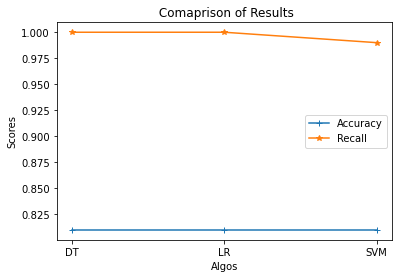

In [415]:
## Accuracy Analysis
acc = [0.81,0.81,0.81]
recall = [1.00,1.00,0.99]
plt.plot(['DT','LR','SVM'],acc,marker='+',label='Accuracy')
plt.ylabel('Scores')
plt.xlabel('Algos')
plt.title(' Comaprison of Results')
plt.plot(['DT','LR','SVM'],recall,marker='*',label='Recall')
plt.legend()
plt.show()

# Critical ANalysis

1. All three algos perfomed similar where Logistic Regression and Decision Tree got the Highest Scores.
I chose time as new metric where average time take by algorithm Decision Tree was less than comapred to all other algorithms 
plus many in many cases logistic reggresion was unable to fit in given max iterations( was givena s warnings) plus nan values obtained in many cases while evauating using SVM and LR.

2. Comparison of precision for tie breaker of LR and DT.

Decision Tree got higher score and is selected and will be saved.

3. Threshold for Retraining model is set to be 5% less of 0.81 (accuracy) and 5% less of 1.00 (Recall) 
Threshold are 0.7695 for accuracy and 0.95 for recall

In [416]:
dt

DecisionTreeClassifier(max_depth=13)

In [417]:
filename = 'static_model.sav'

In [418]:
import pickle
pickle.dump(dt, open(filename, 'wb'))

In [419]:
filename = 'dynamic_model.sav'

In [303]:
pickle.dump(lr, open(filename, 'wb'))